# Linear classifier implementations
In this notebook I have implemented the following:
* Generated a 200-size dataset - 2 sets of 2D points, each is normally distributed (labeled 1/0)
* Perceptron - Batch & Stochastic
* Demostra

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import time
%matplotlib inline


First, let's create our dataset:

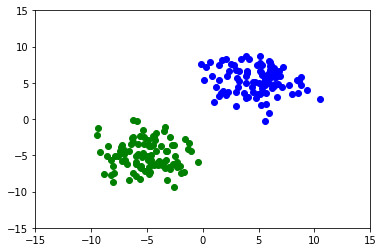

In [9]:
# generating 2 normal disterbuted classes
class_A = np.concatenate((np.random.normal(5, 2, 100).reshape(100, -1),
                          np.random.normal(5, 2, 100).reshape(100, -1),
                          np.ones(100).reshape(100, -1)), axis=1)
class_B = np.concatenate((np.random.normal(-5, 2, 100).reshape(100, -1),
                          np.random.normal(-5, 2, 100).reshape(100, -1),
                          np.zeros(100).reshape(100, -1)), axis=1)

# concatenate and shuffle
mat = np.concatenate((class_A, class_B))
np.random.shuffle(mat)

pd.DataFrame(mat, columns=['x', 'y', 'class']).describe()

X = mat[:,:-1]
y = mat[:,-1]


def show_plot(mat, thetas=None, p=None):
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    class_A = mat[mat[:,2] == 1]
    class_B = mat[mat[:,2] == 0]
    plt.scatter(class_A[:,0], class_A[:,1], color='blue')
    plt.scatter(class_B[:,0], class_B[:,1], color='green')
    if not thetas is None:
        x = np.linspace(-15, 15, 2)
        y = (-thetas[0]*x - thetas[2]) / thetas[1]
        plt.plot(x, y, color='red')
    if not p is None:
        plt.plot(p[0], p[1], 'r*')

    plt.show()


show_plot(mat)

# The Perceptron
The Perceptron is an algorithm for supervised learning of binary classifiers, based on a linear predictor function combining a set of weights with the feature vector.

Consider a date set of $m$ instences and $n$ features and let $w\in \mathbb{R}^n$ be the weight vector and $b$ the bias.<br>
The execution a algorithm will be:
$$f\left(\overrightarrow{x}\right)=\begin{cases}1 & \overrightarrow{w}\cdot \overrightarrow{x}+b\ge0\\0 & \overrightarrow{w}\cdot \overrightarrow{x}+b<0\end{cases}$$
Where $\overrightarrow{w}\cdot \overrightarrow{x}$ is the dot product $\sum _{i=1} ^n w_i \cdot x_i$
note: the bias shifts the decision boundary away from the origin and does not depend on any input value.<br><br>
In our case, the classifier will be of the form: $$w_0 x + w_1 y + b = 0$$
So $n=2$ and $m=200$. Let's implement.


In [5]:
def predict(x, w, b):
    return 1 if w @ x + b >= 0 else 0

## Learning
We will implement two different teqnuiue of learning. Stochastic and Batch.<br>
First, let us initialize essential parameters:

In [6]:
def initialize_thetas(random=False):
    # where theta is the vector weights t1,t2,t3 of the linear line t1*x + t2*y + t3*b = 0
    if random:
        thetas = np.random.uniform(low=-1, high=1, size=(3,))
    else:
        thetas = np.array([-1,1,1]).astype('float64')

    return thetas


thetas = initialize_thetas()

# set learning rate
lr_stochastic = 0.1
lr_batch = 0.01

note that our weight vector $w$ is defined as $\Theta$, including the bias which is $\Theta_2$.

## Stochastic Perceptron
this technique evaluates and updates the weights every iteration.

The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, and will be updated if it is misclassified.<br>

Basically, the learning process will be:<br><br>
Initialize $w$ randomly<br>
Repeat until convergence/fixed number of iterations:<br>

&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp; $o^{(d)} = sgn(w\cdot x^{(d)} + b)$<br>
&emsp;&emsp; Foreach $w_i\in w$ update:<br>
&emsp;&emsp;&emsp; $w_i = w_i -\eta (o^{(d)} - t^{(d)})\cdot x_i^{(d)}$<br>
&emsp;&emsp;&emsp; $b = -\eta (o^{(d)} - t^{(d)})$<br>

Where $\eta$ is the learning rate.<br><br>
Note that if the prediction is corrent, then $o^{(d)} - t^{(d)} = 0$, so no change of weights. <br>
If not, the classfier needs to be updated towards the sign of $(o^{(d)} - t^{(d)})$.




Our dataset consisted of 2 classes detributed normally each. Setting a descent learning rate, we can find the classifier iterating a few times over each instance.<br>
Initializing our weight vector $w$ to [-1,1,1] (defined as $\Theta$).<br><br>
reminder: our linear line is of the form $\Theta_0 x + \Theta_1 y + \Theta_2 b = 0$

final thetats: [-1.  1.  1.]


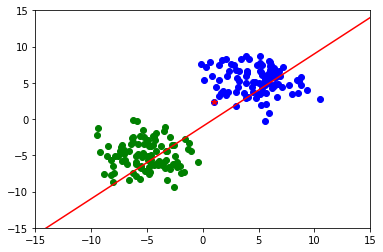

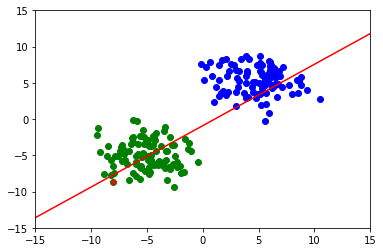

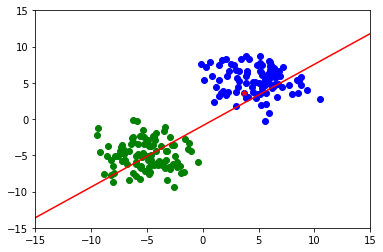

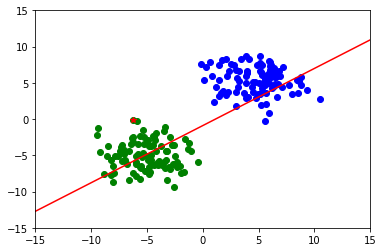

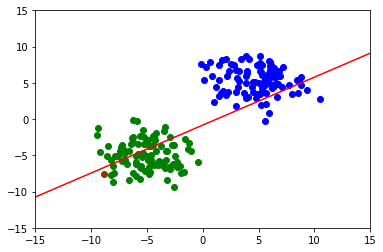

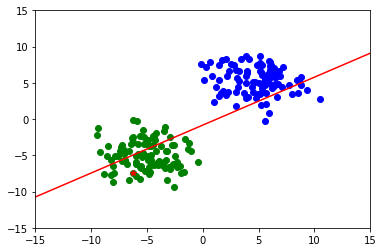

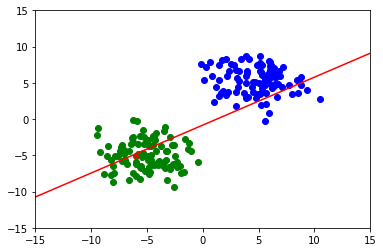

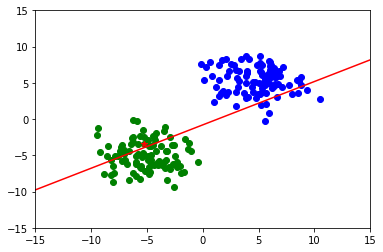

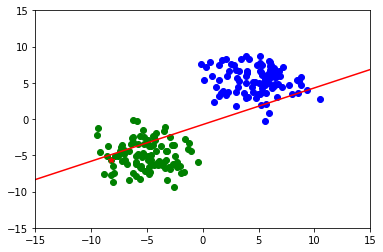

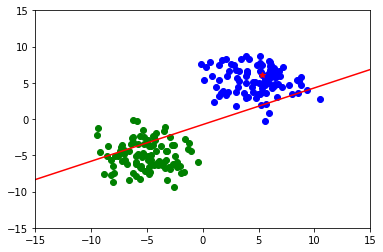

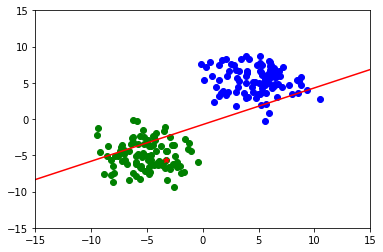

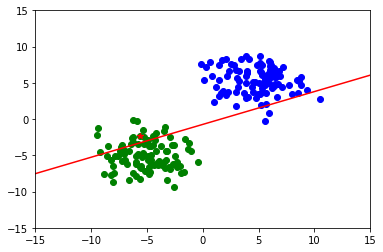

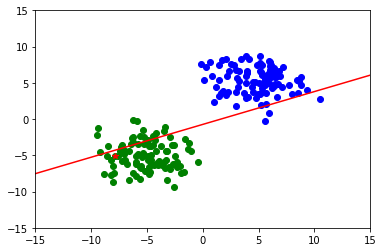

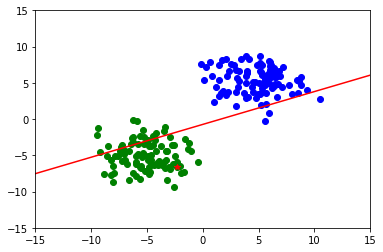

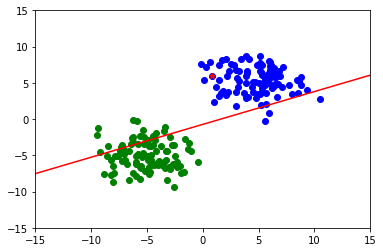

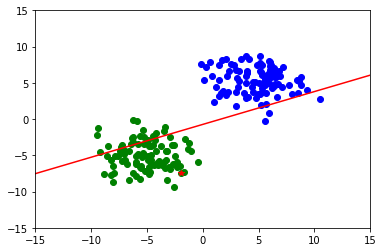

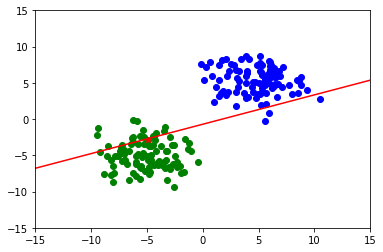

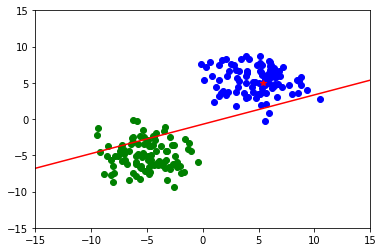

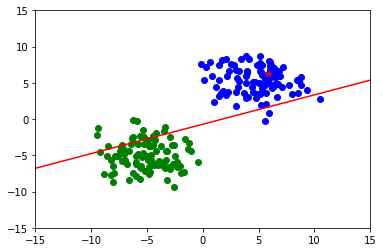

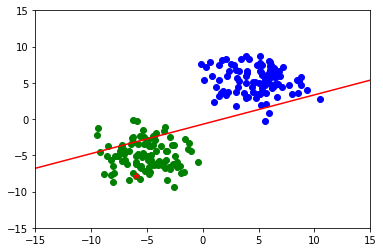

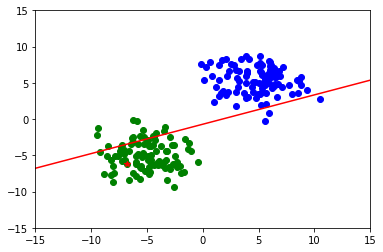

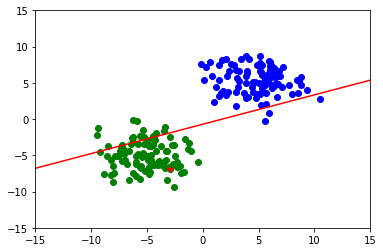

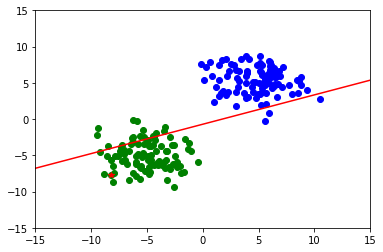

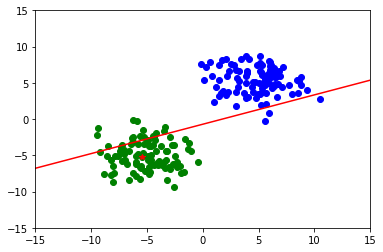

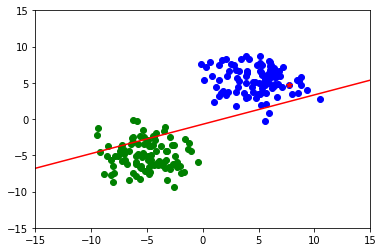

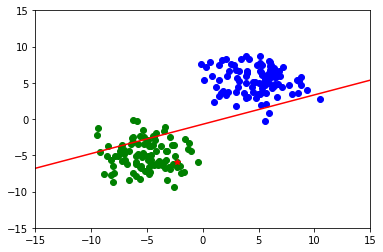

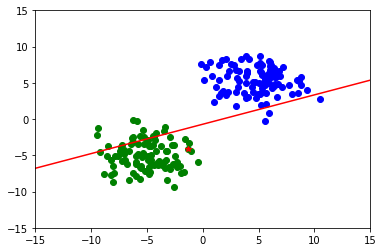

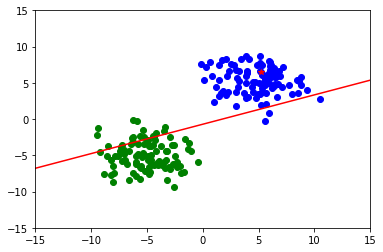

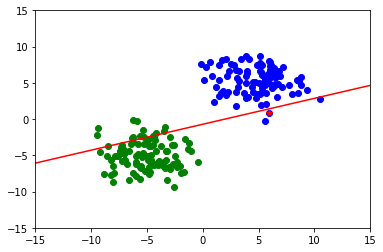

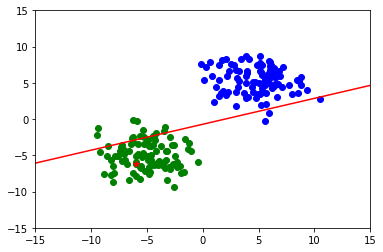

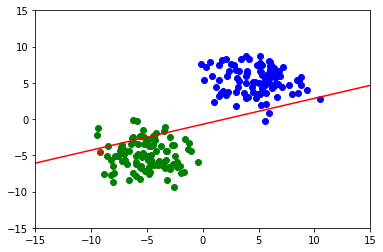

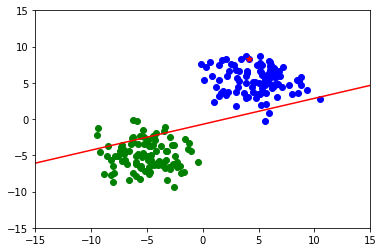

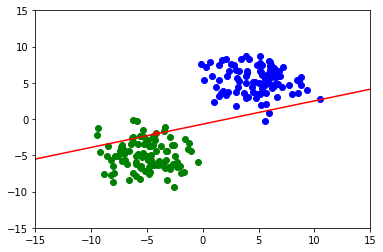

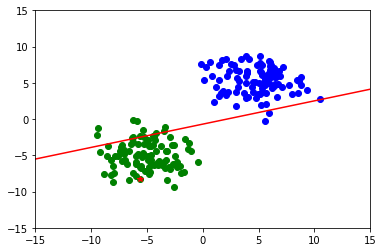

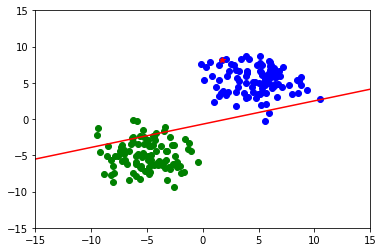

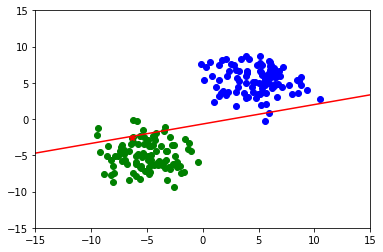

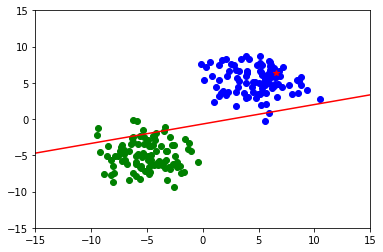

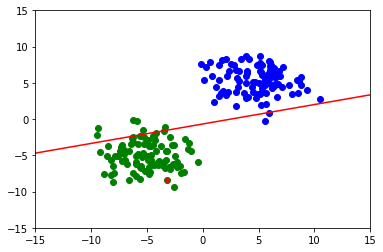

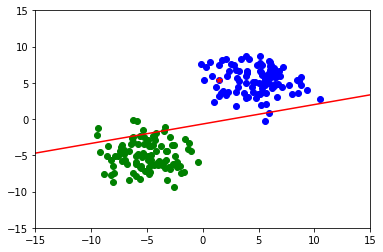

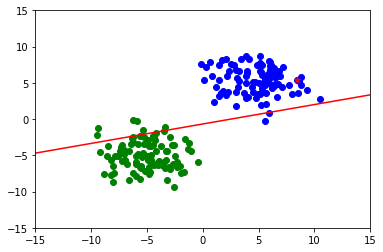

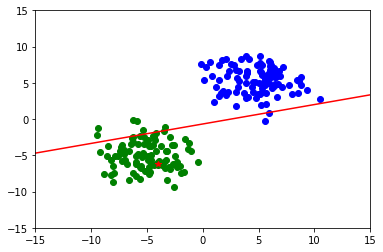

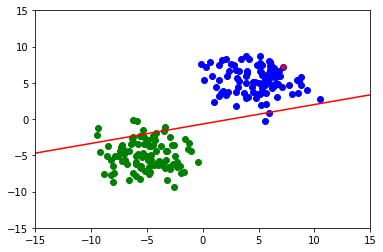

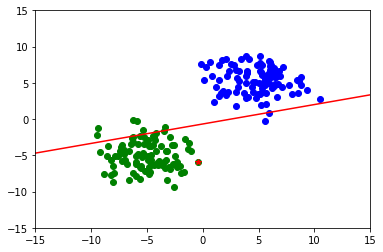

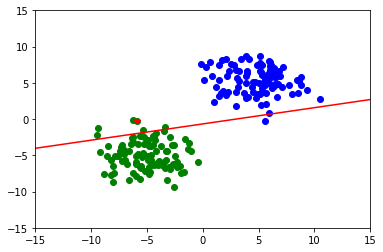

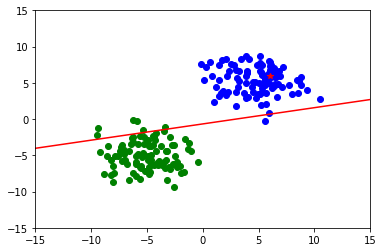

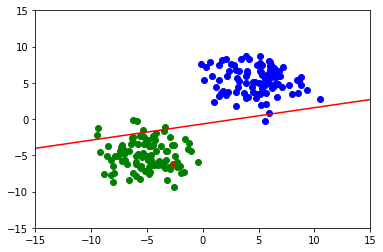

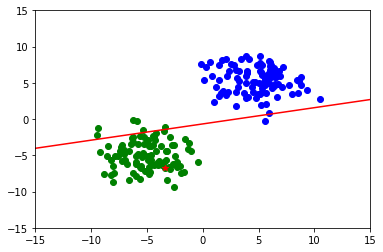

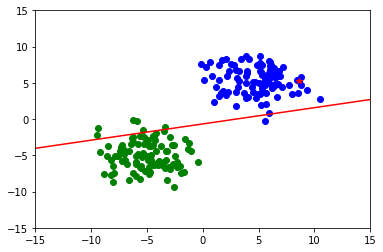

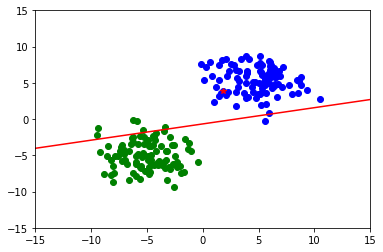

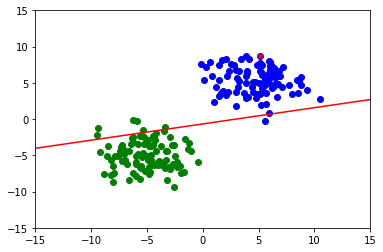

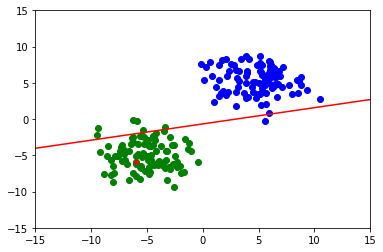

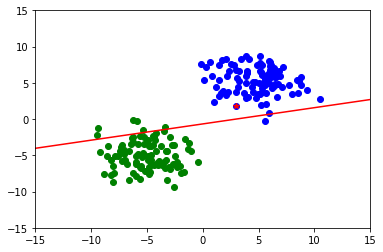

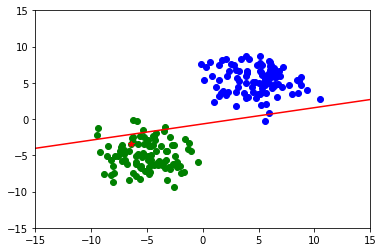

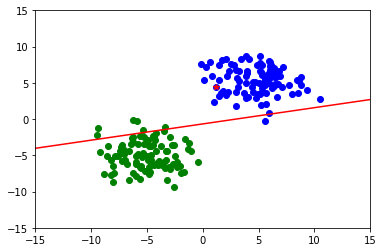

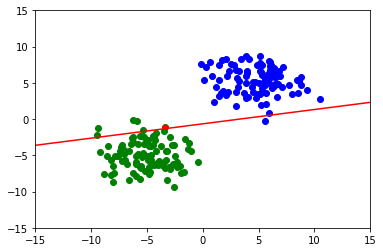

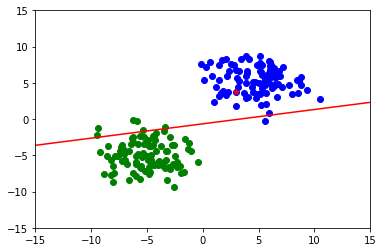

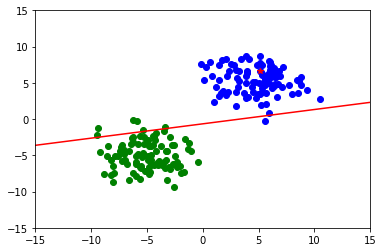

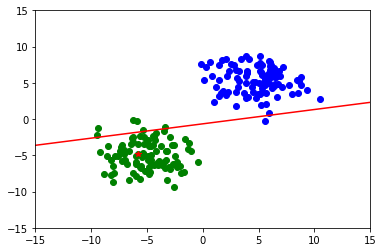

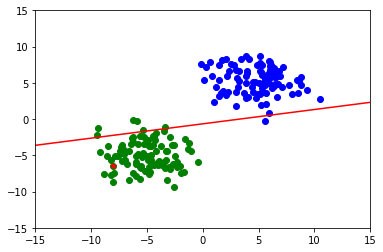

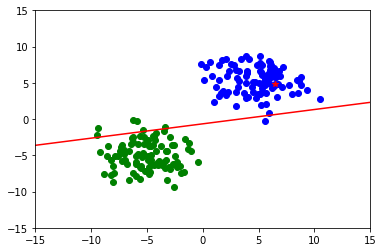

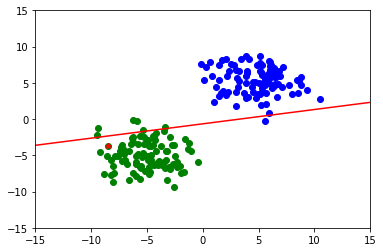

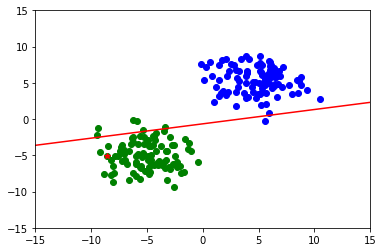

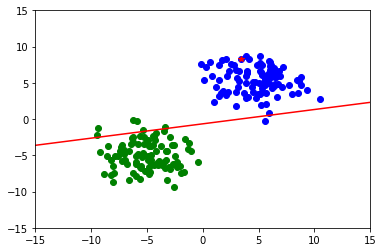

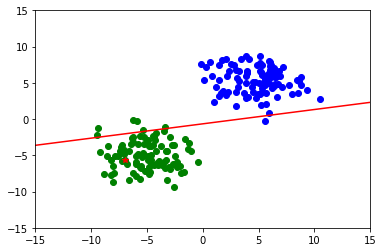

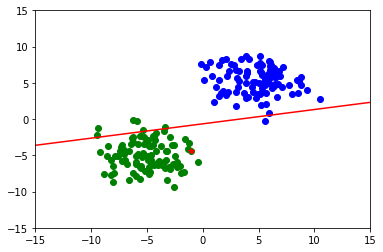

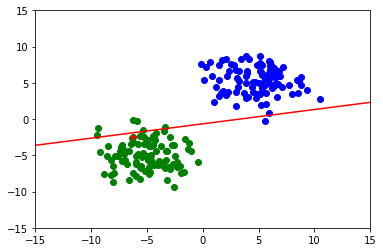

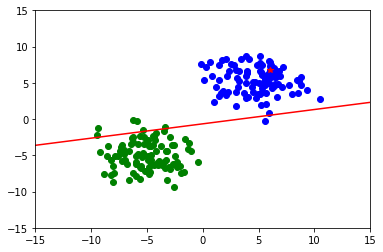

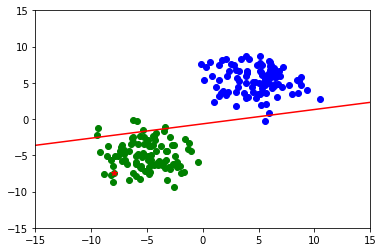

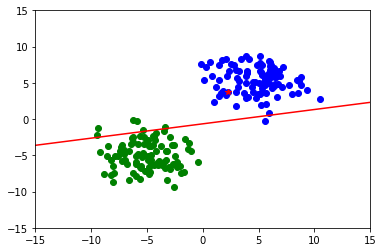

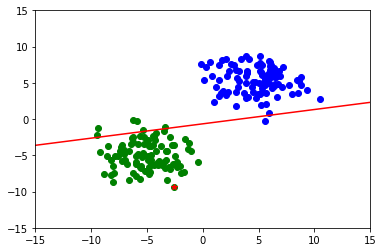

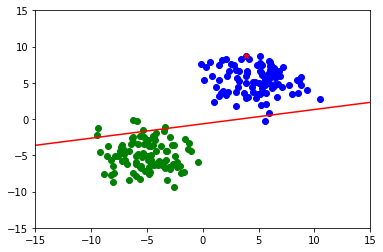

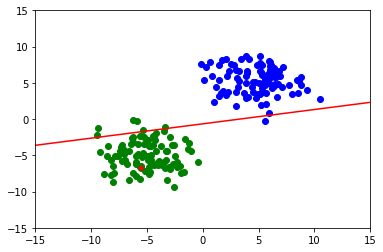

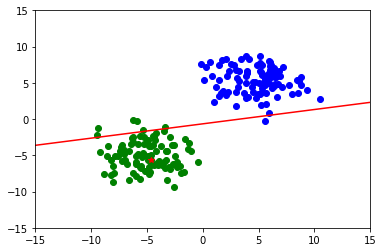

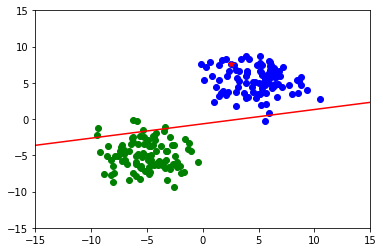

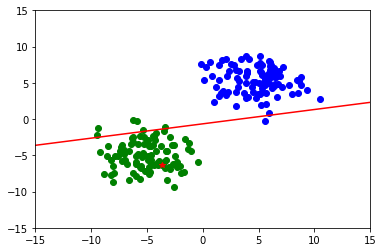

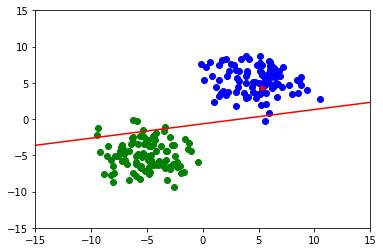

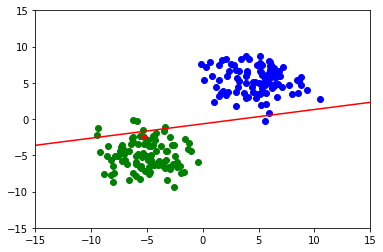

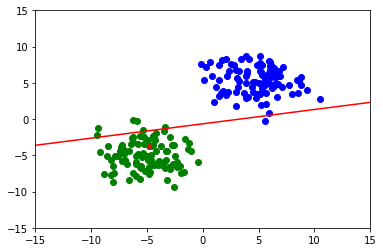

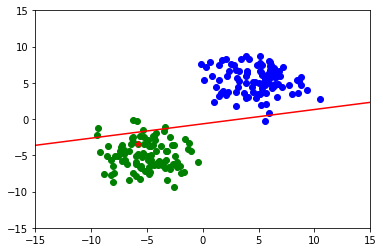

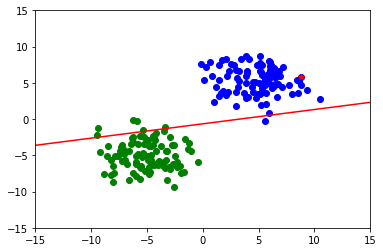

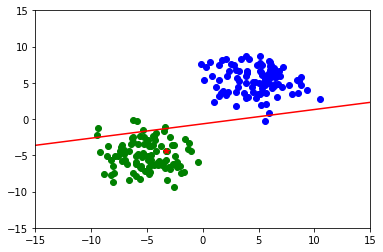

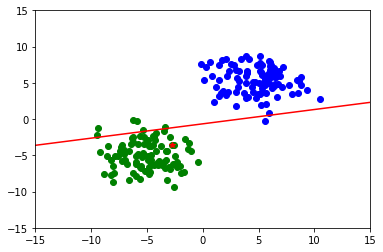

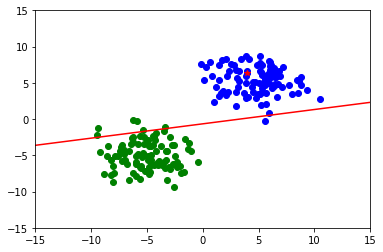

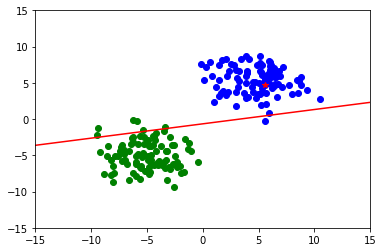

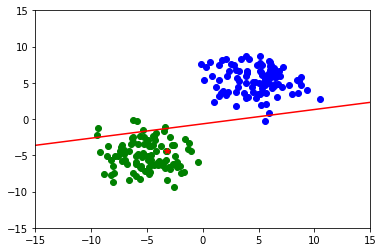

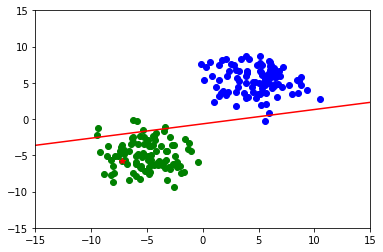

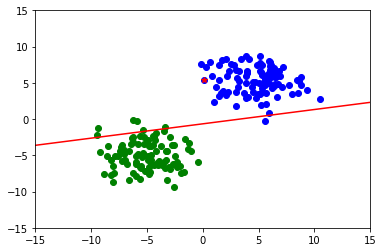

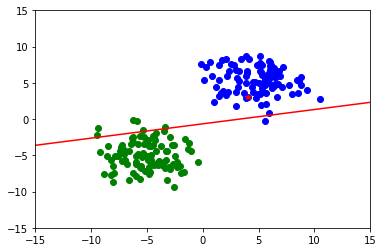

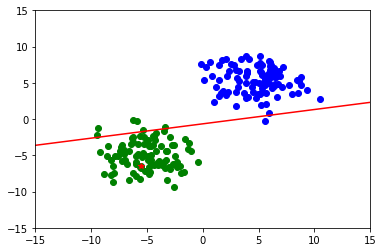

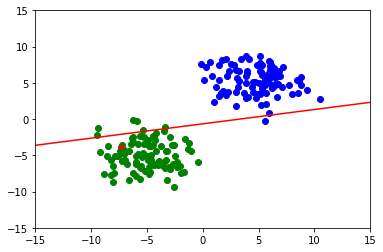

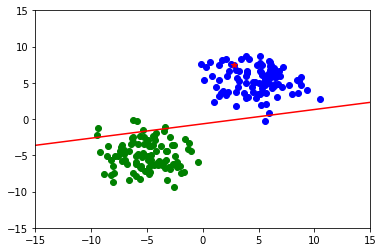

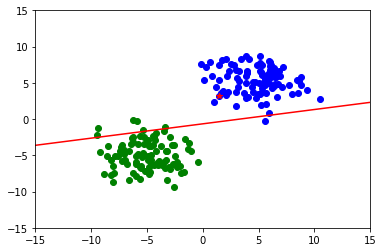

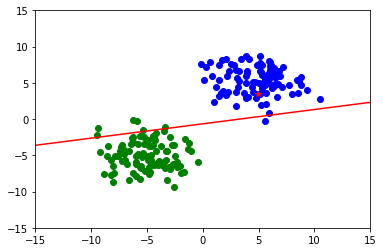

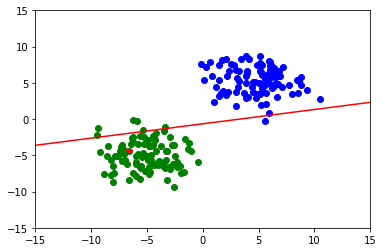

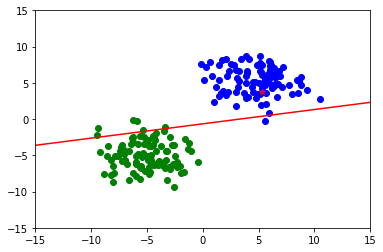

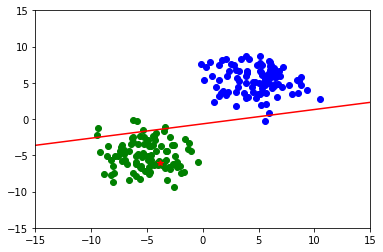

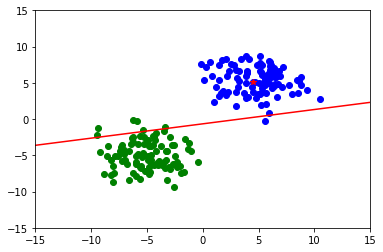

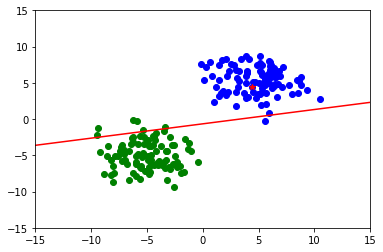

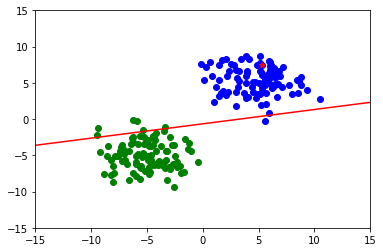

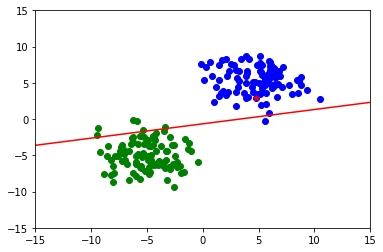

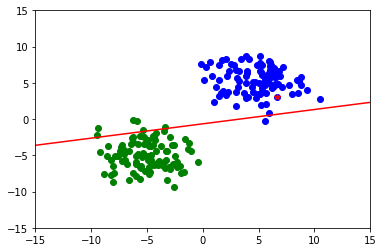

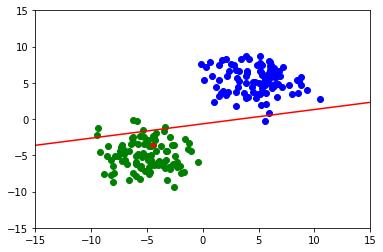

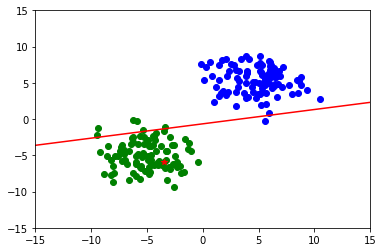

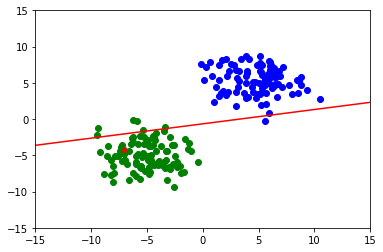

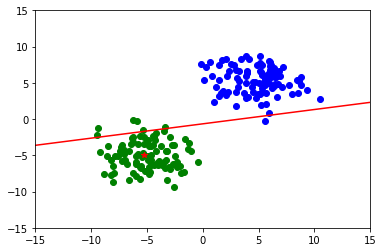

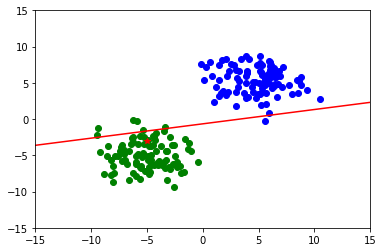

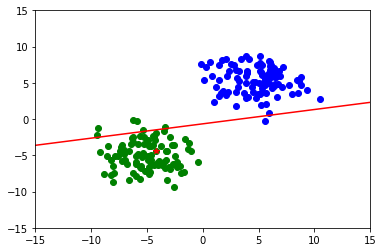

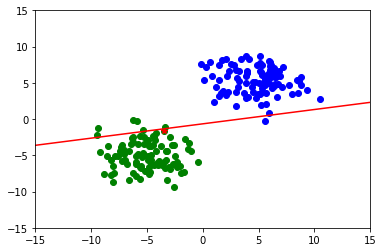

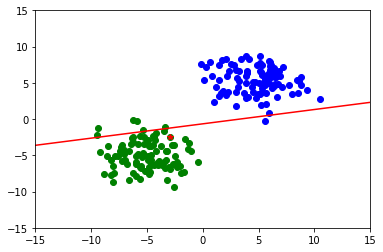

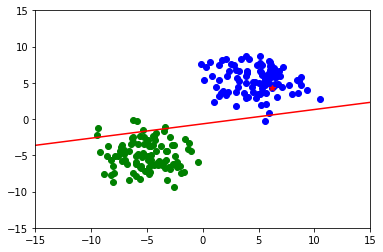

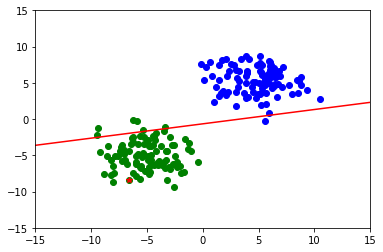

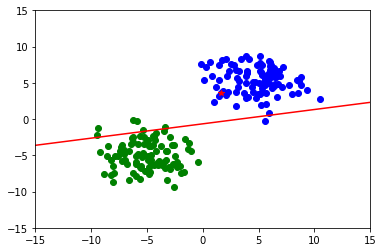

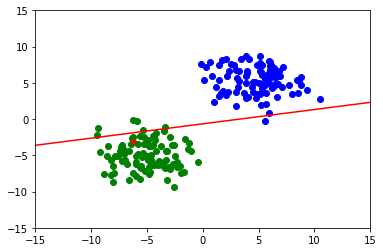

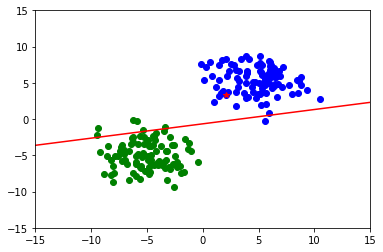

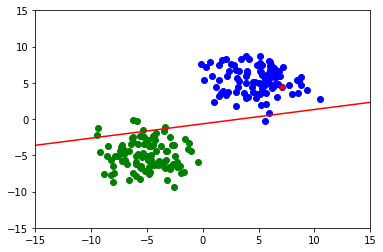

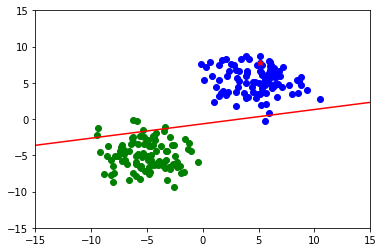

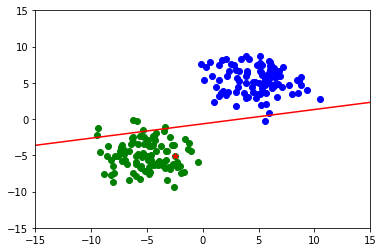

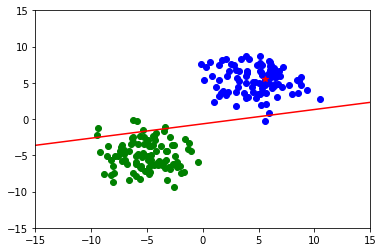

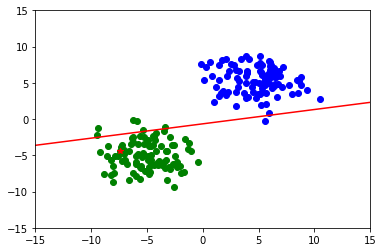

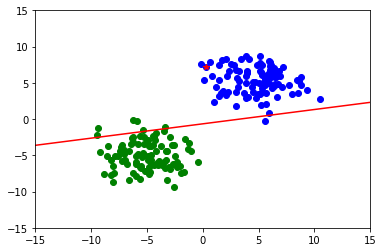

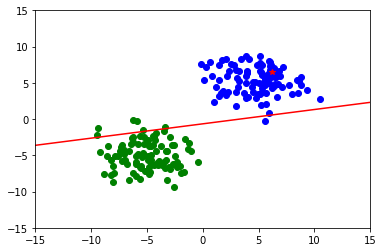

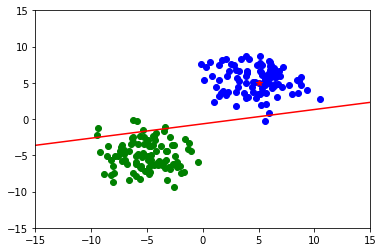

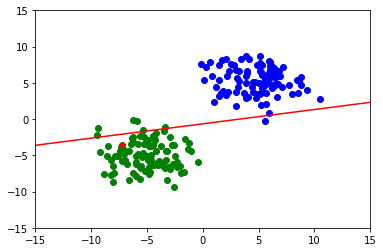

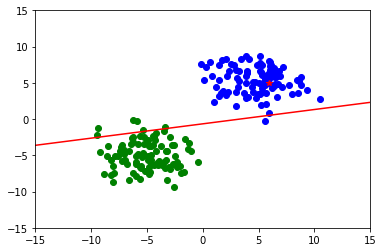

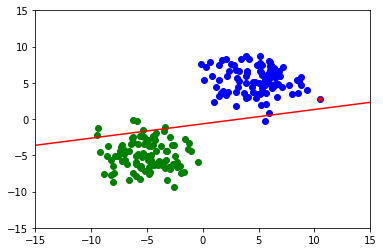

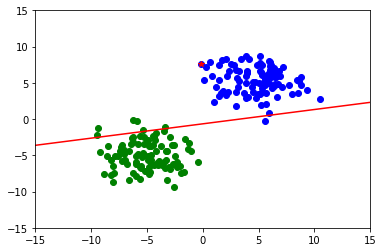

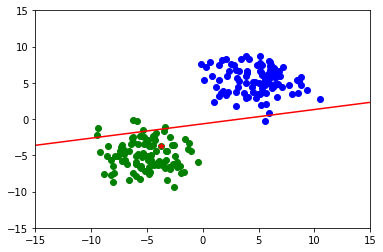

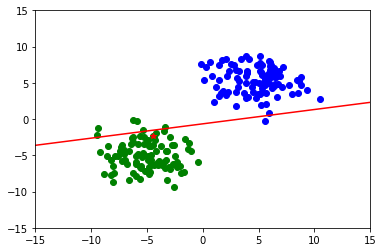

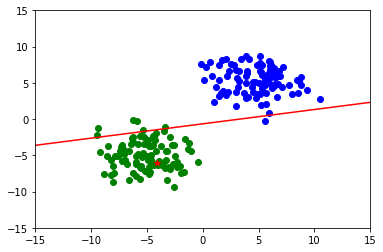

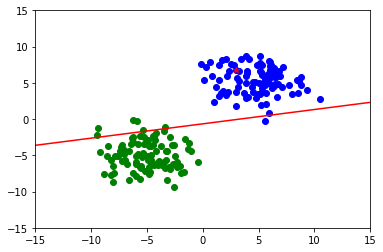

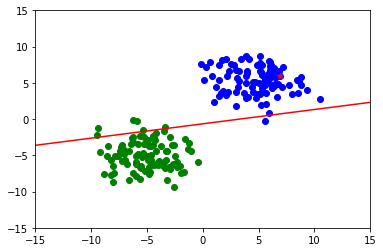

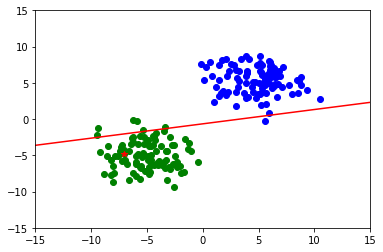

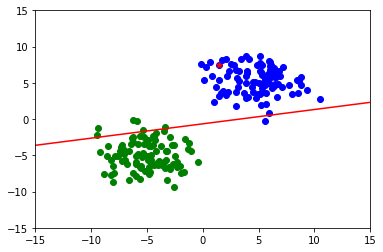

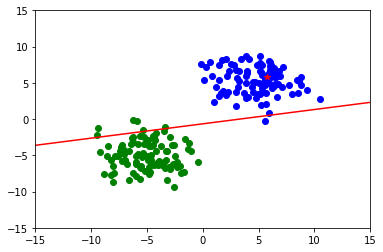

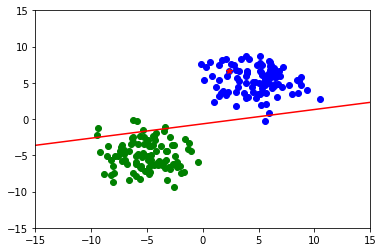

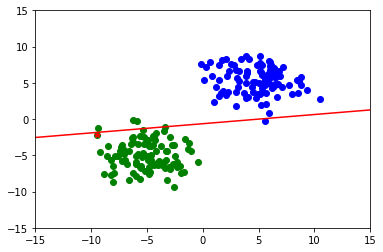

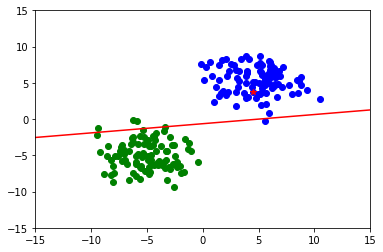

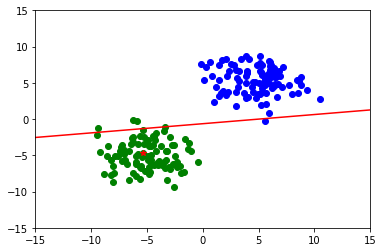

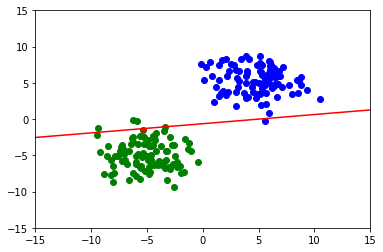

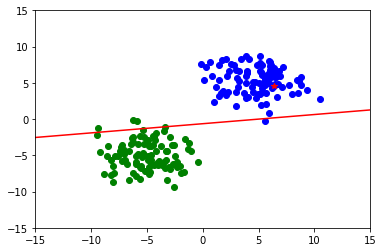

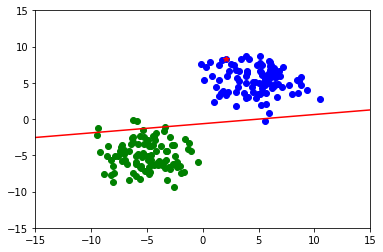

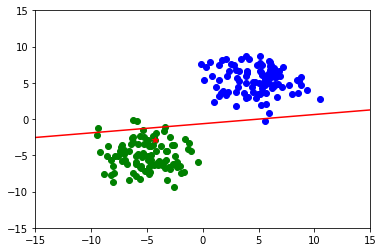

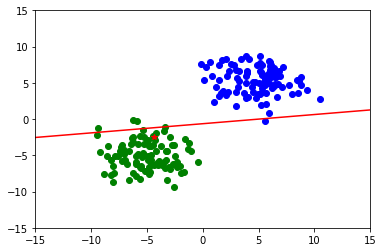

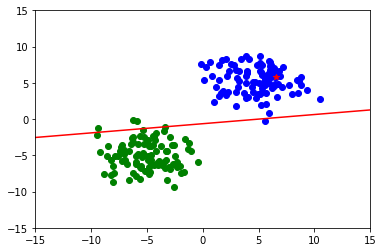

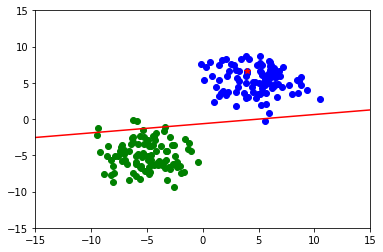

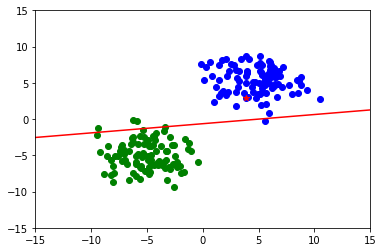

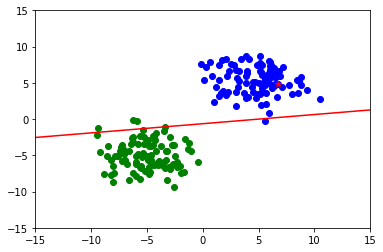

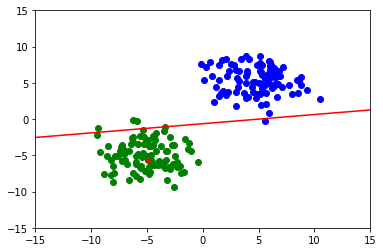

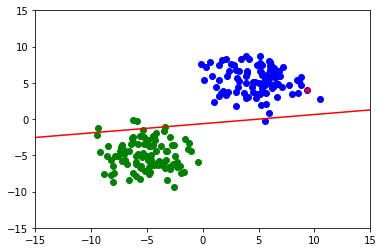

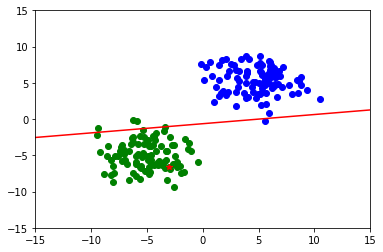

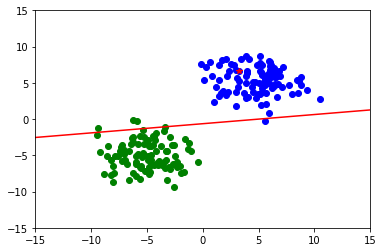

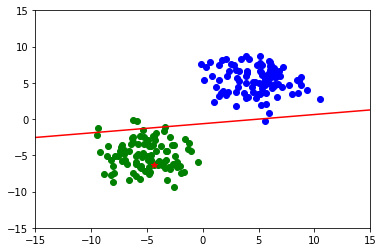

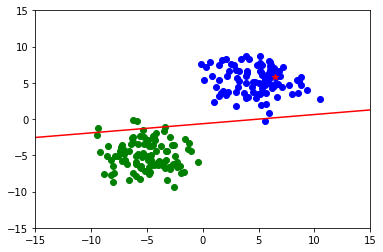

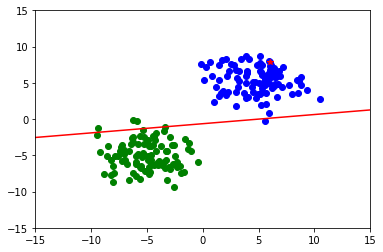

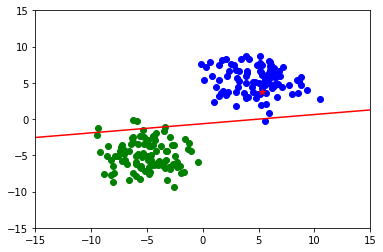

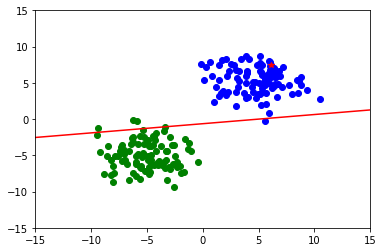

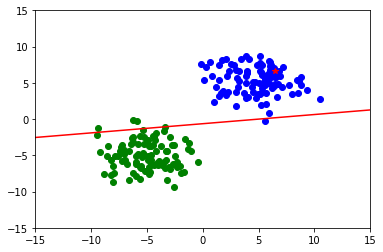

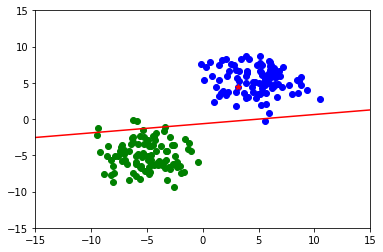

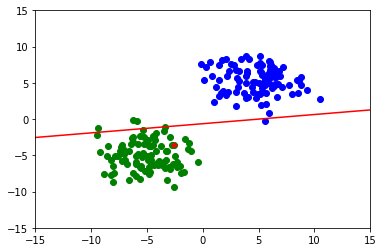

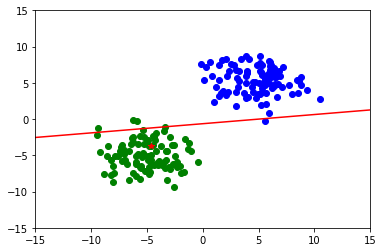

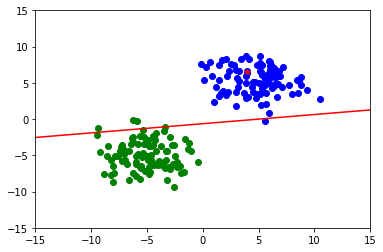

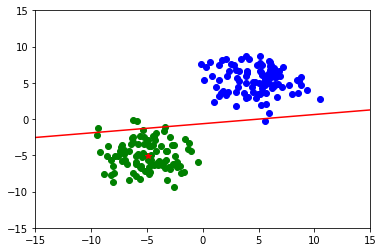

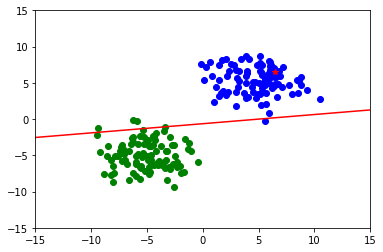

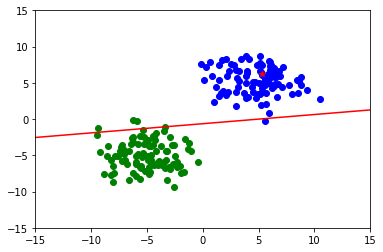

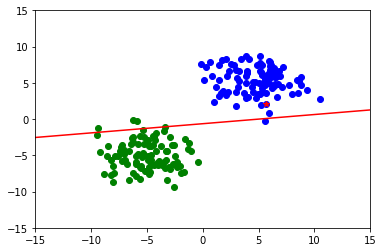

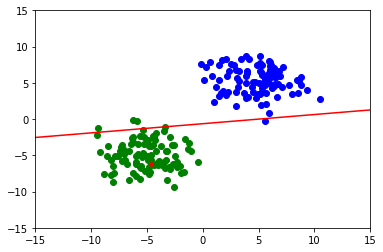

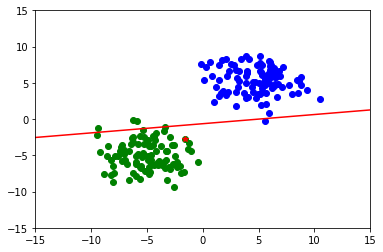

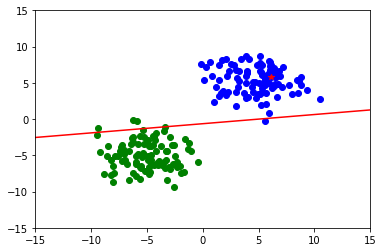

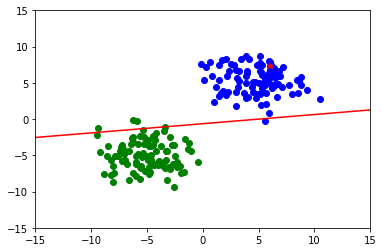

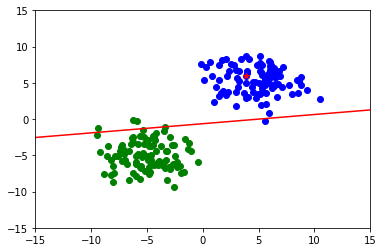

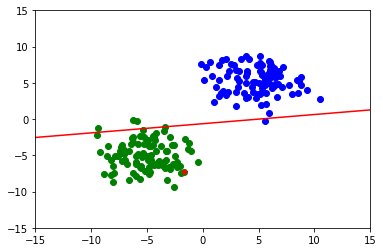

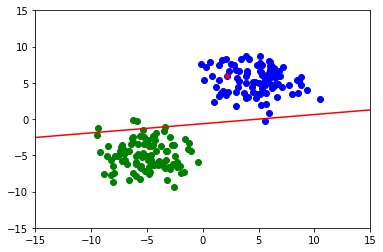

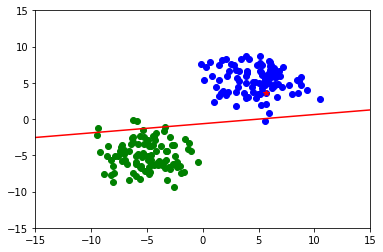

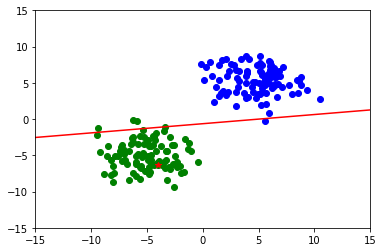

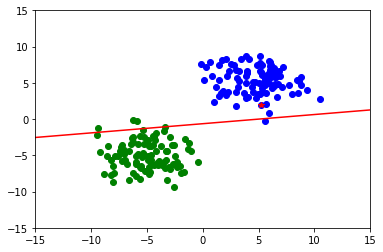

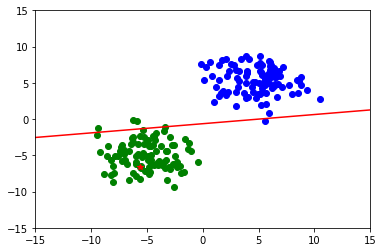

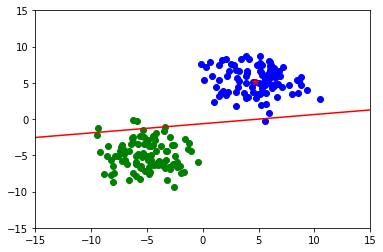

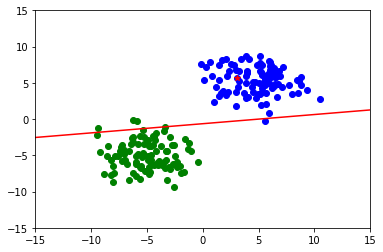

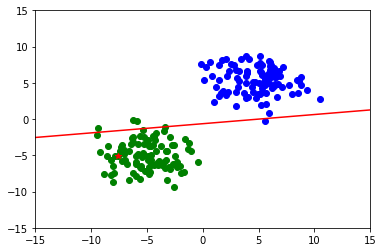

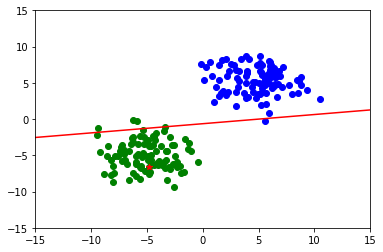

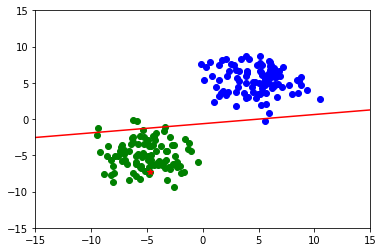

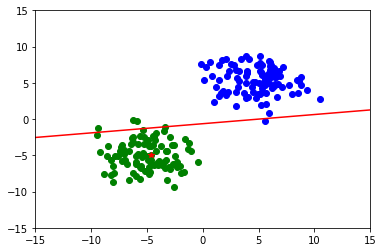

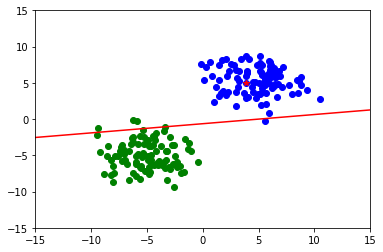

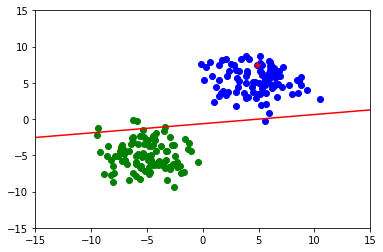

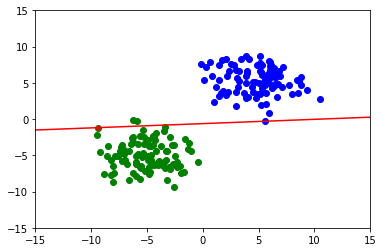

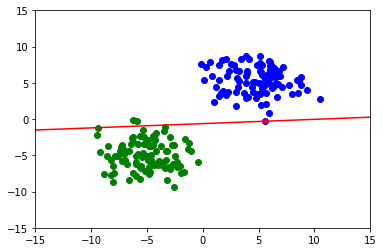

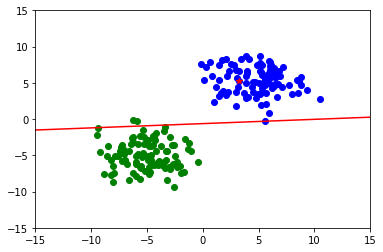

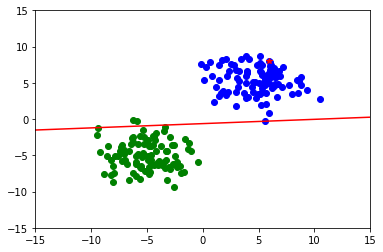

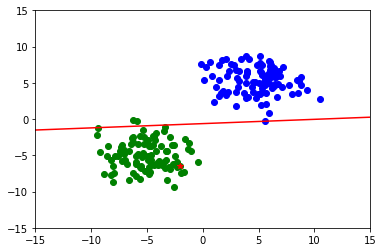

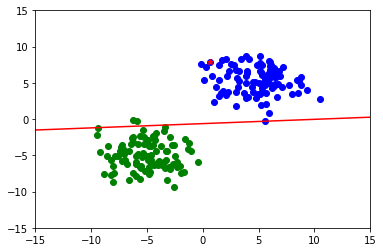

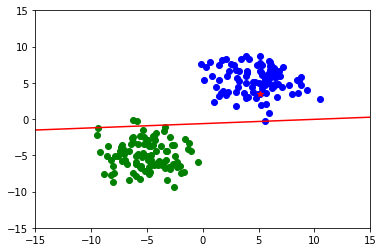

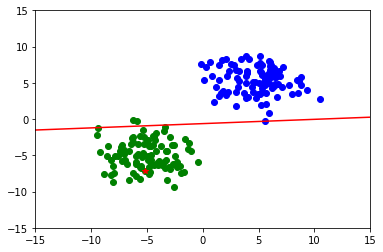

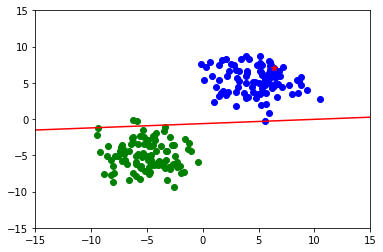

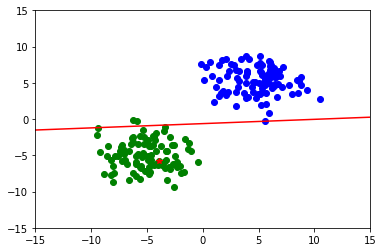

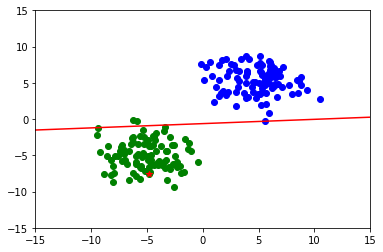

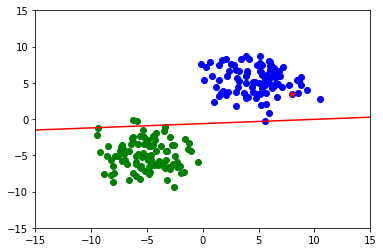

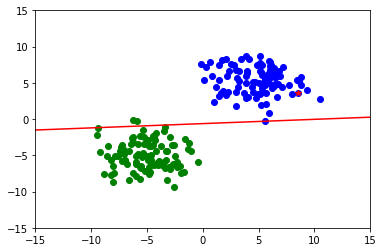

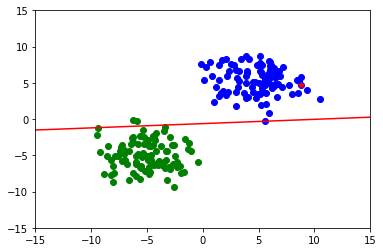

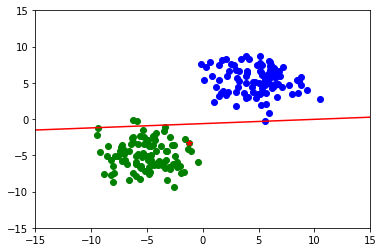

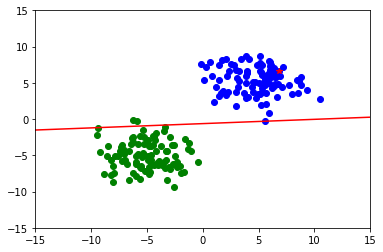

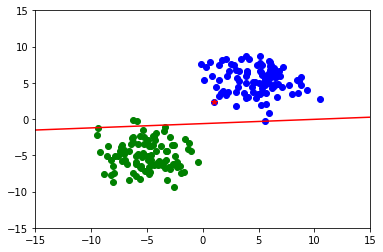

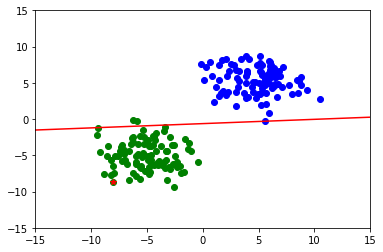

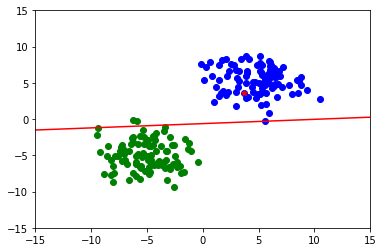

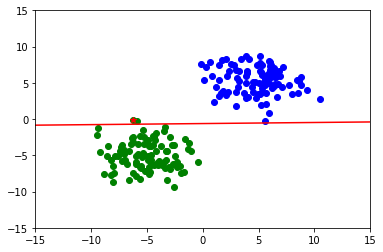

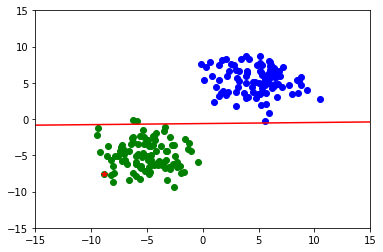

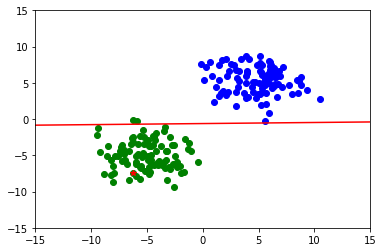

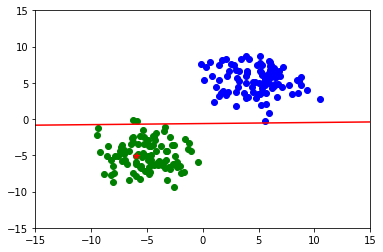

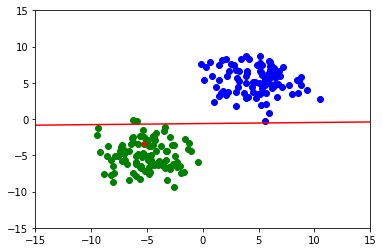

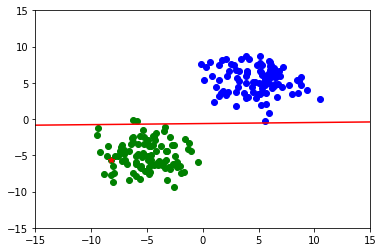

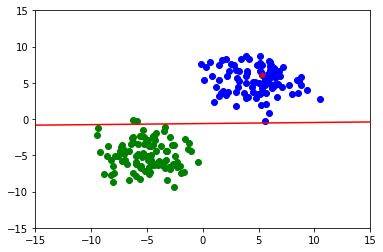

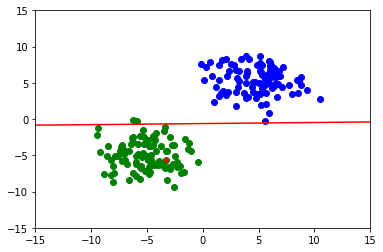

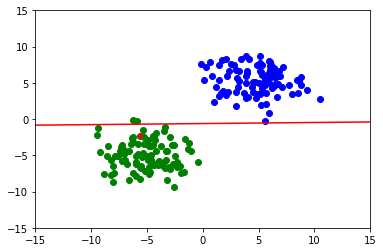

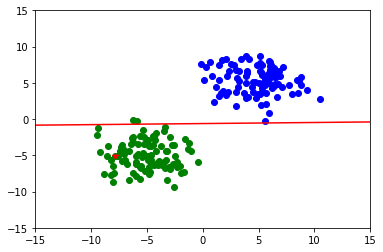

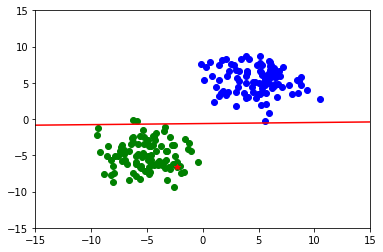

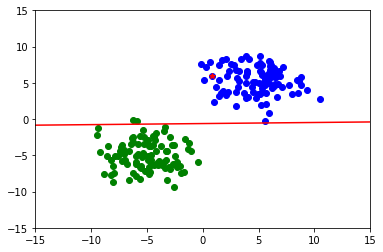

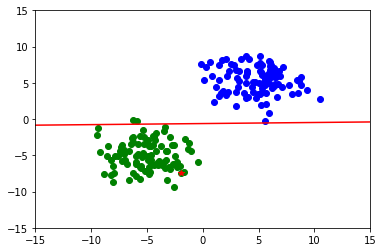

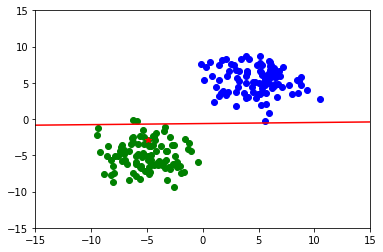

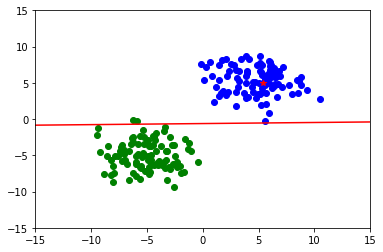

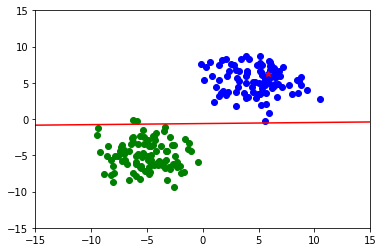

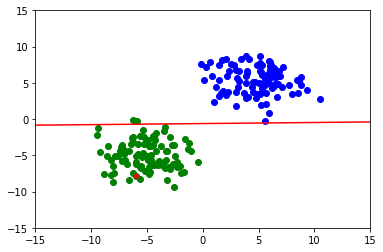

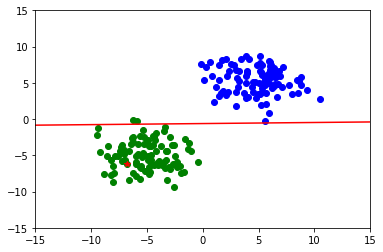

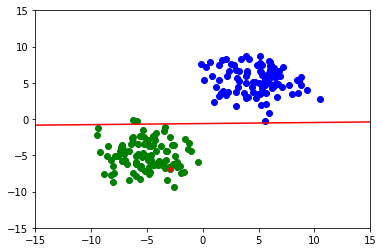

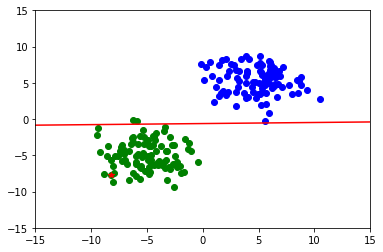

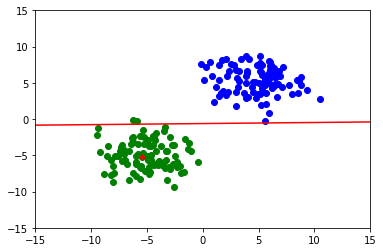

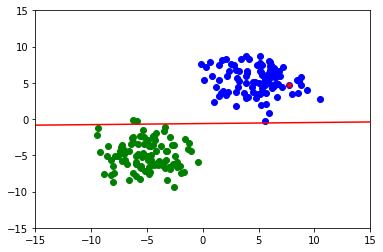

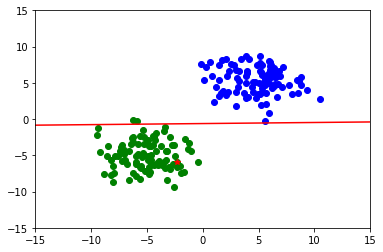

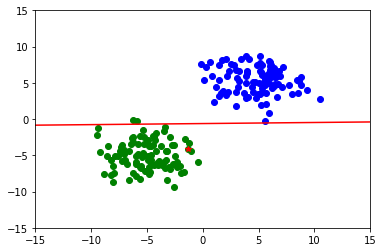

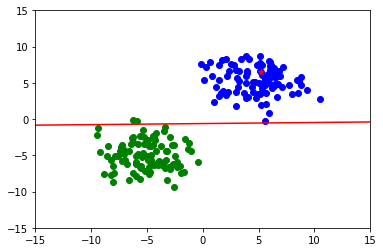

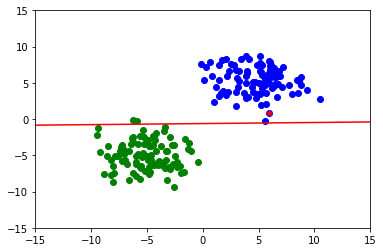

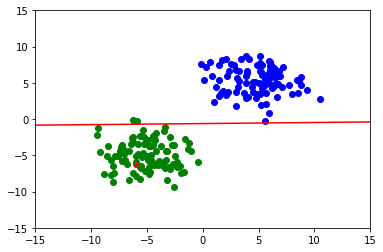

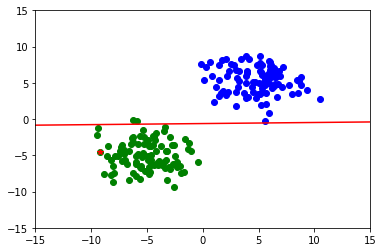

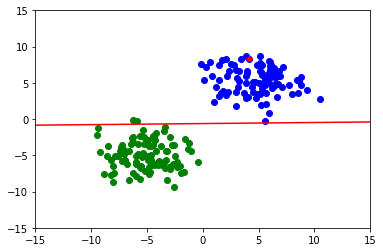

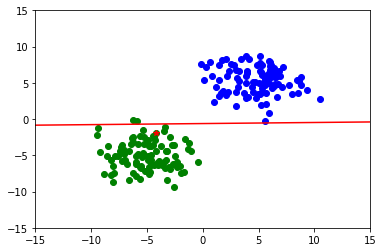

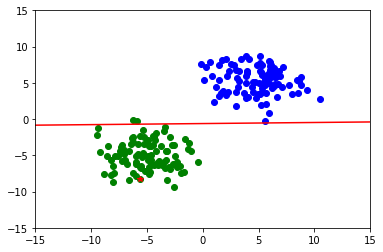

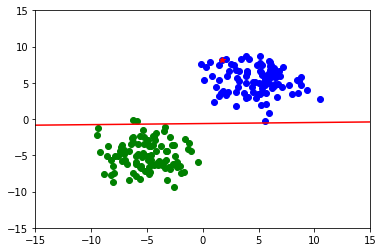

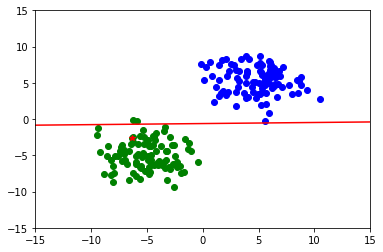

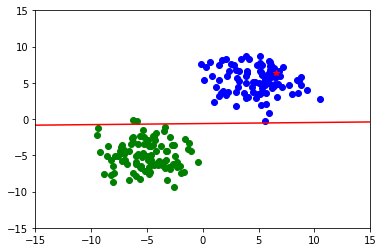

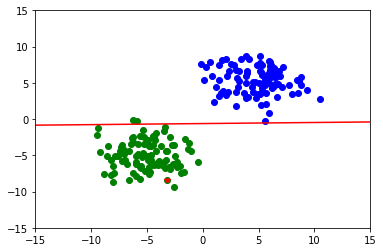

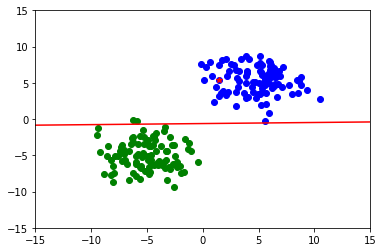

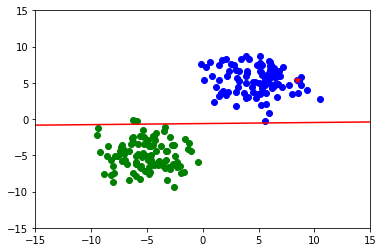

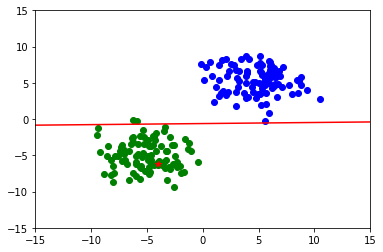

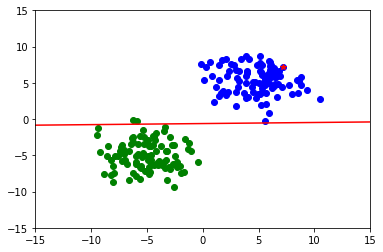

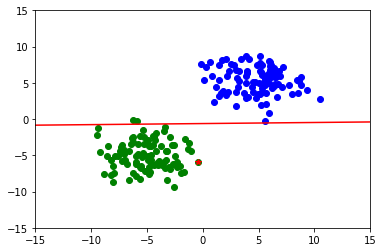

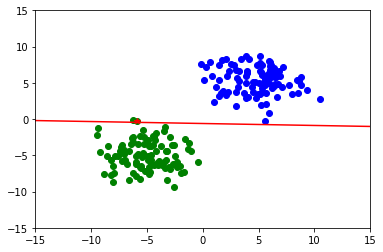

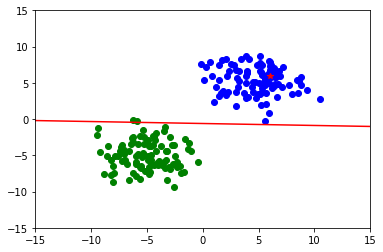

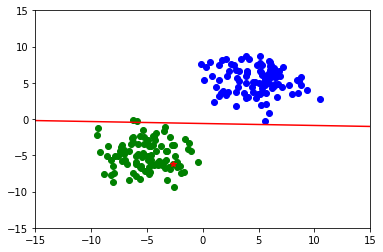

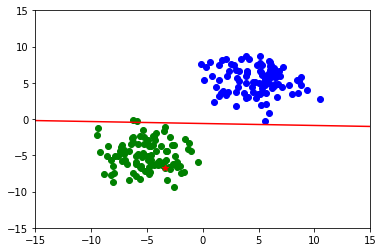

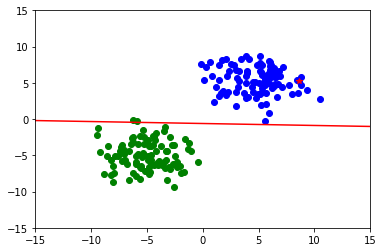

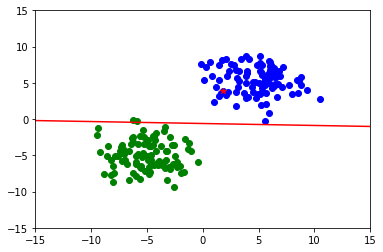

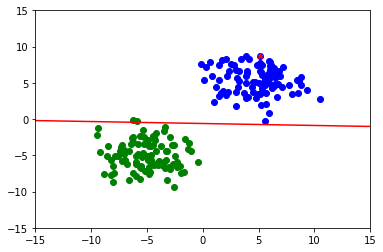

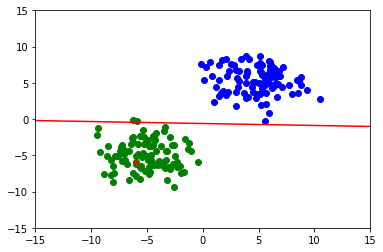

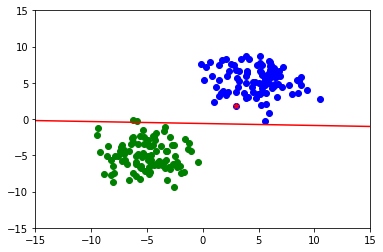

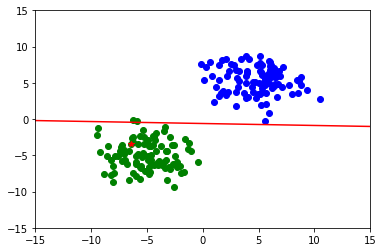

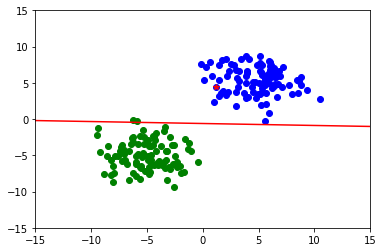

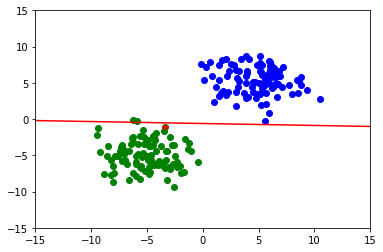

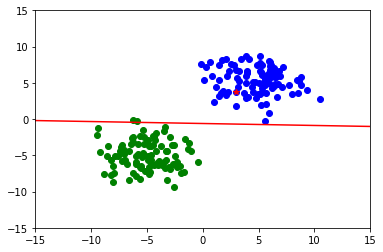

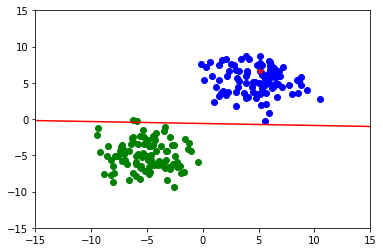

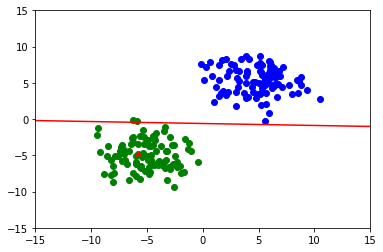

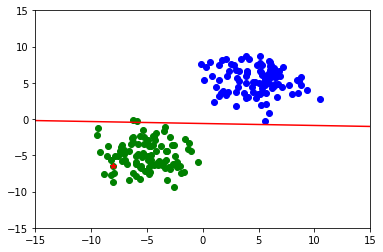

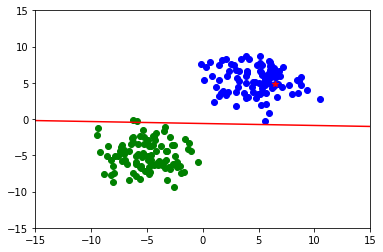

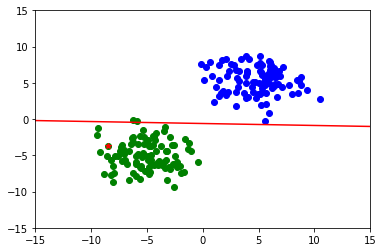

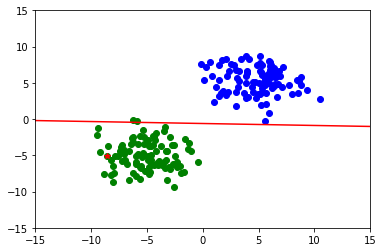

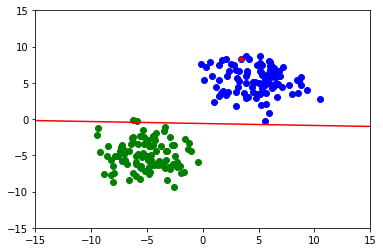

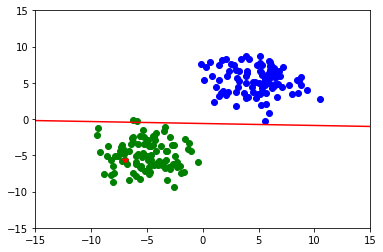

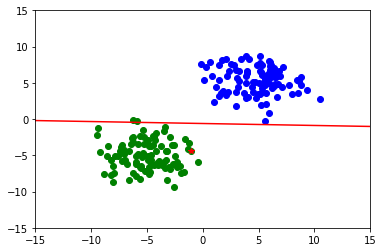

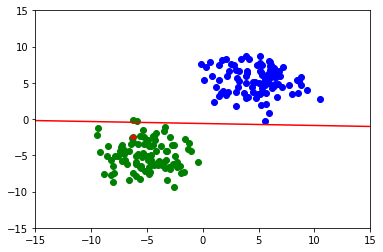

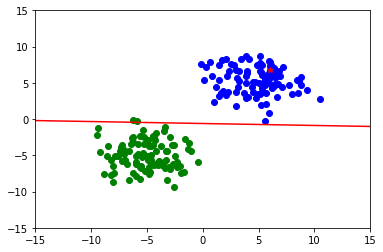

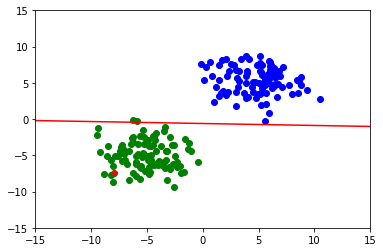

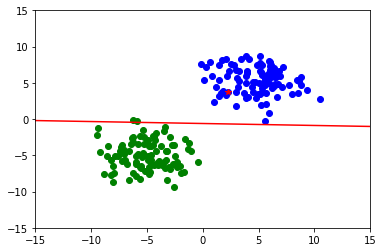

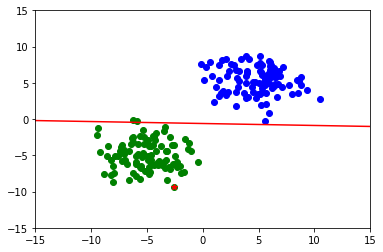

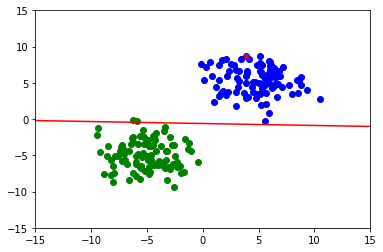

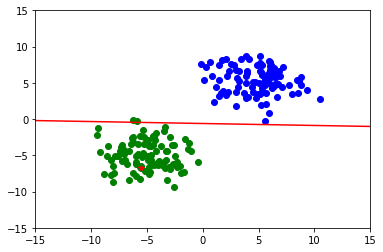

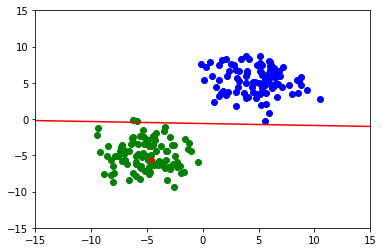

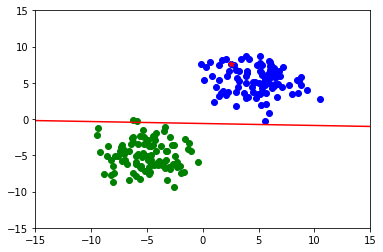

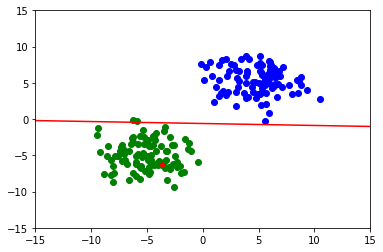

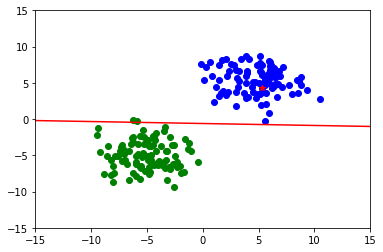

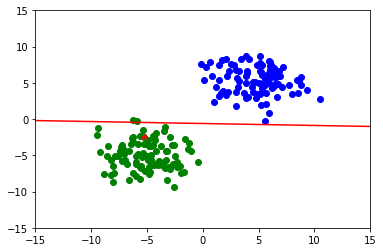

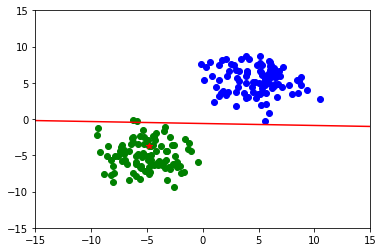

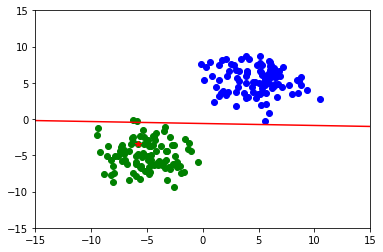

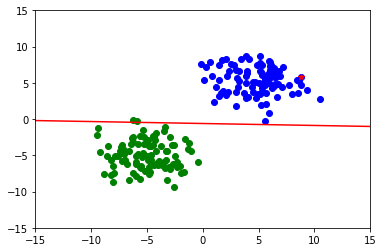

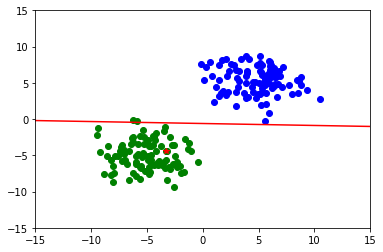

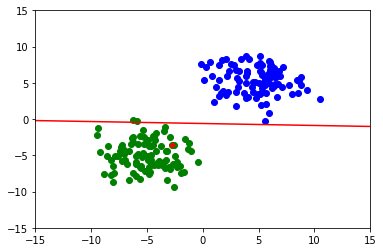

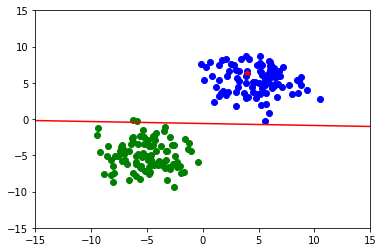

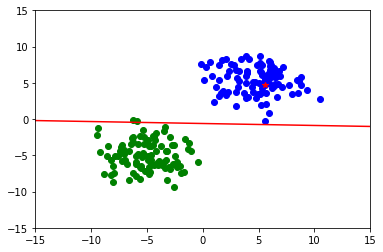

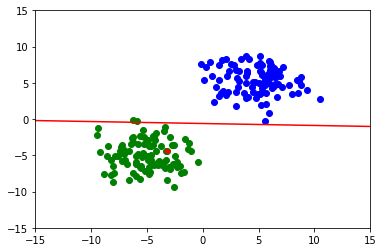

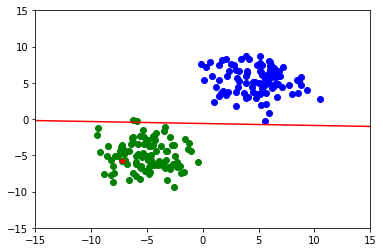

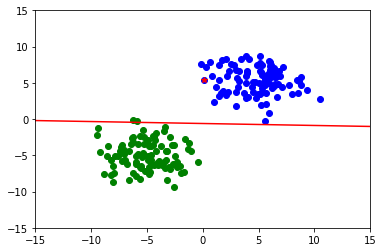

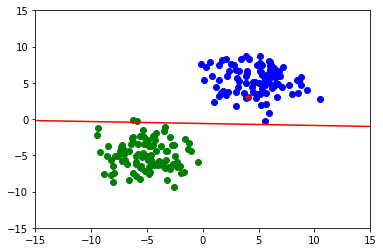

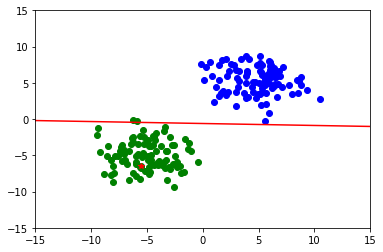

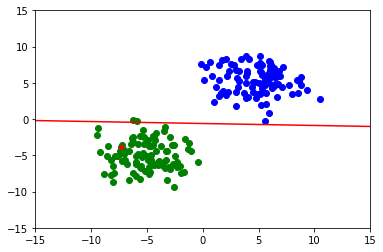

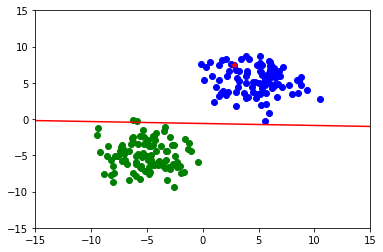

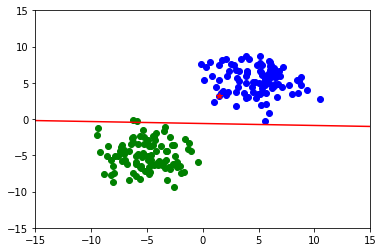

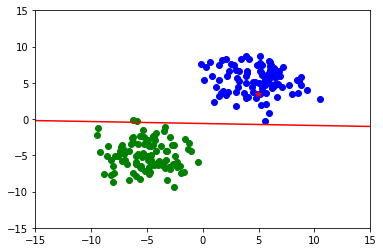

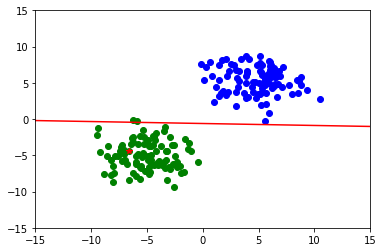

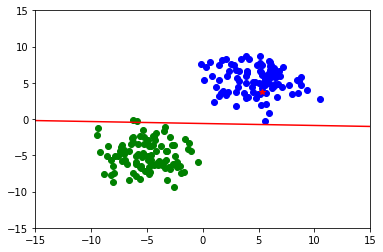

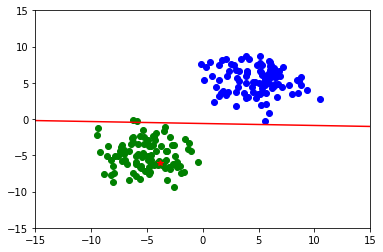

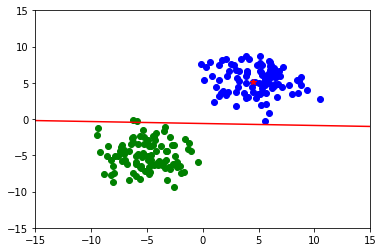

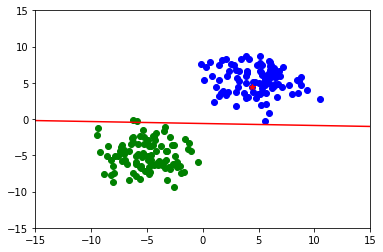

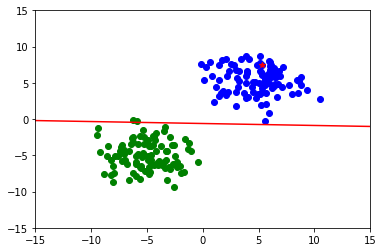

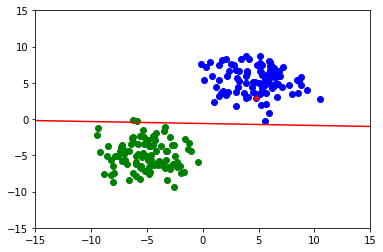

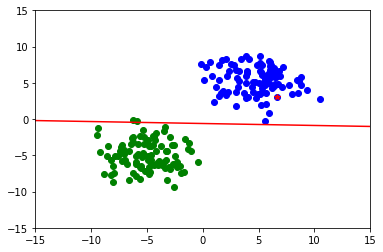

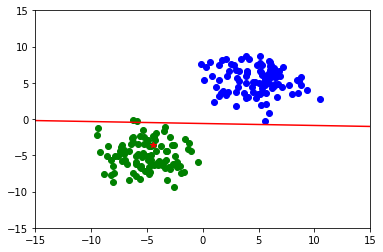

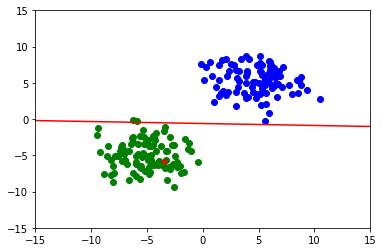

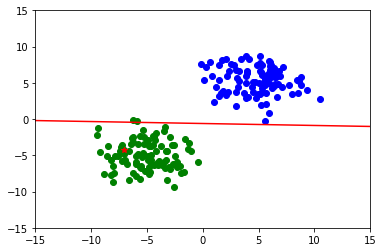

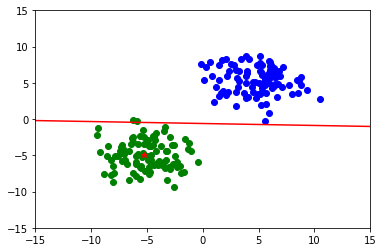

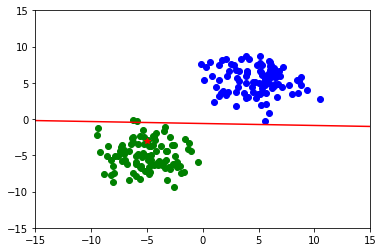

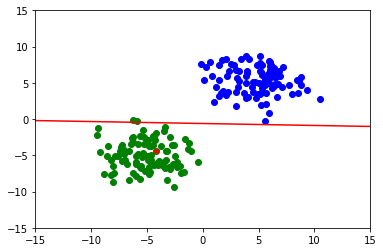

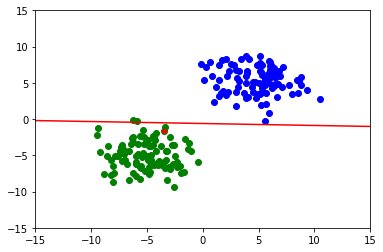

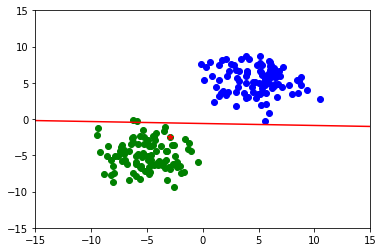

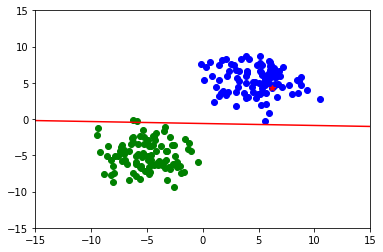

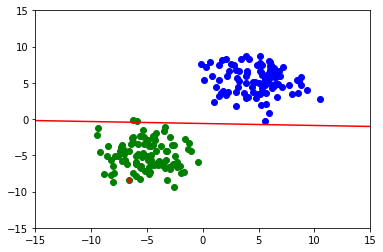

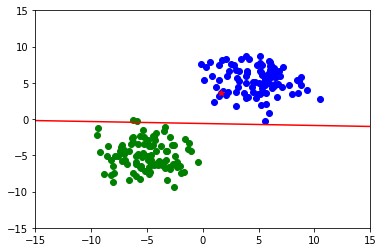

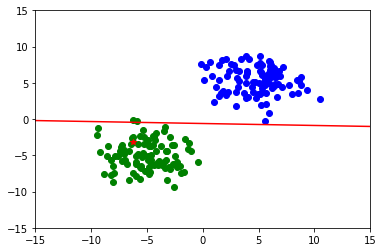

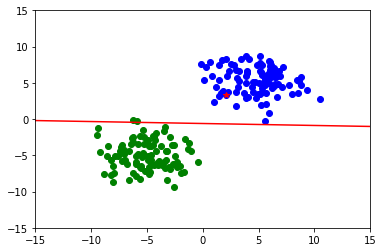

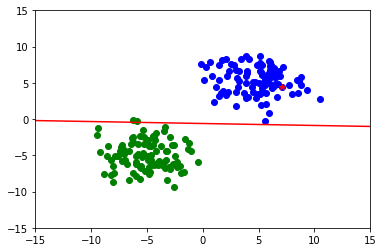

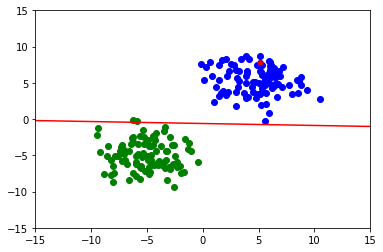

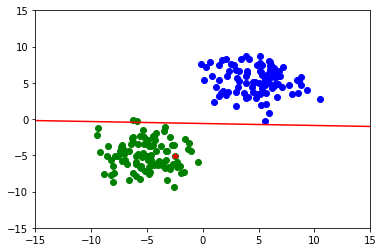

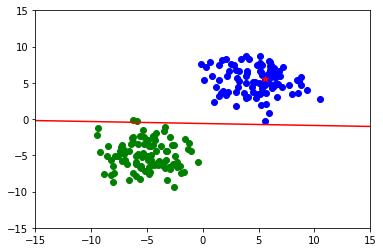

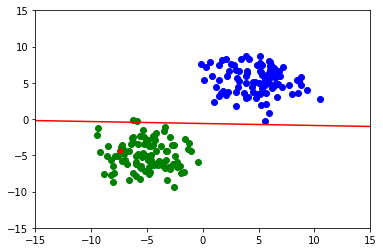

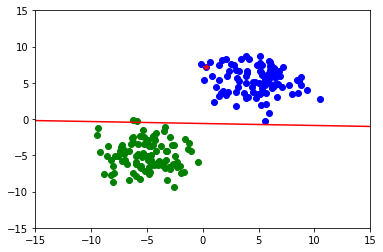

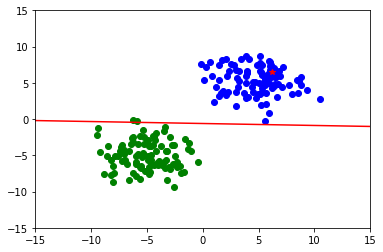

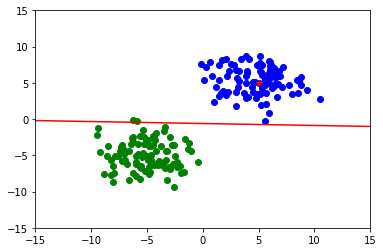

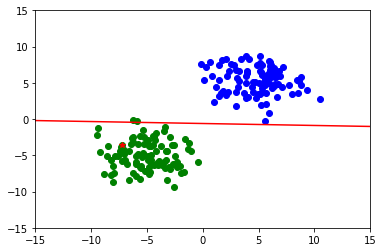

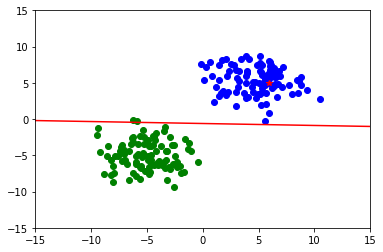

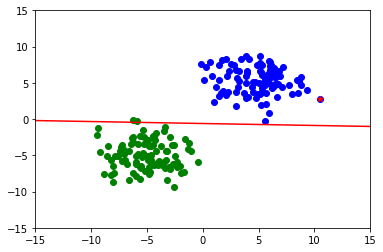

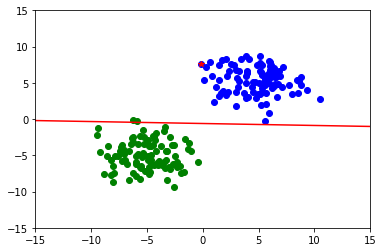

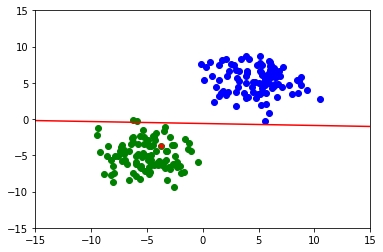

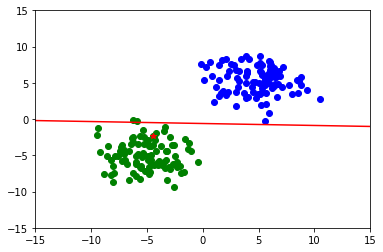

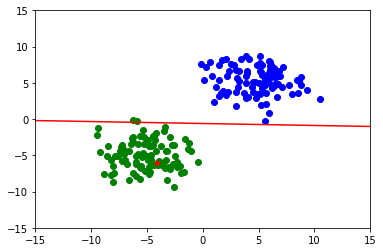

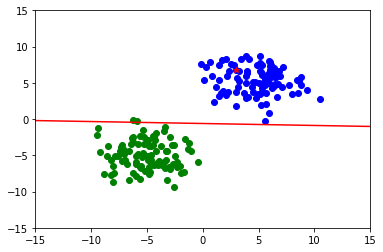

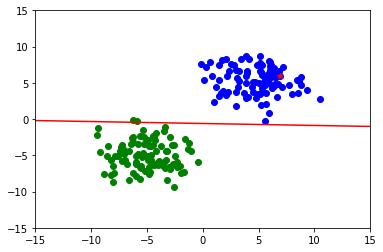

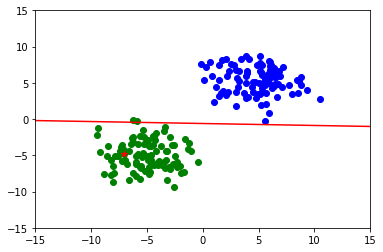

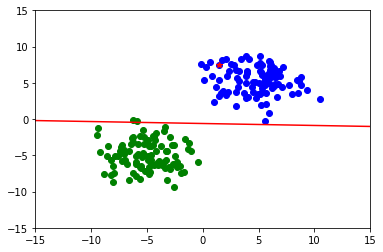

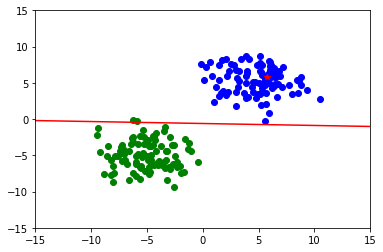

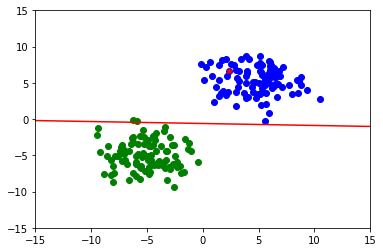

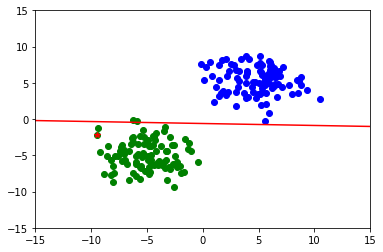

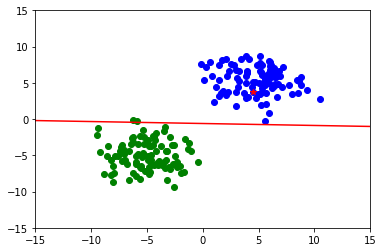

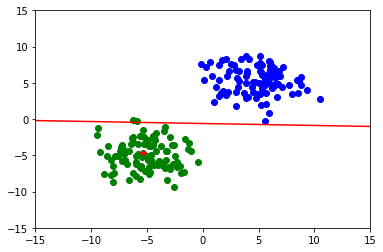

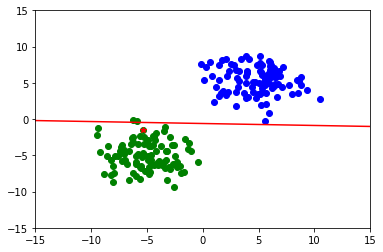

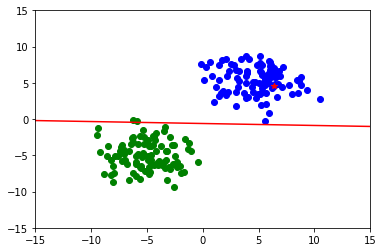

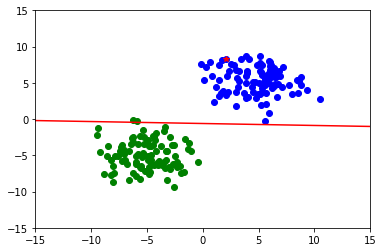

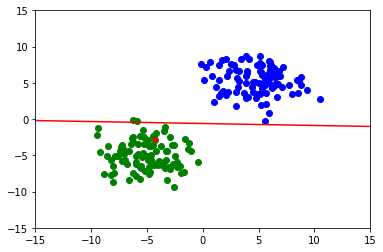

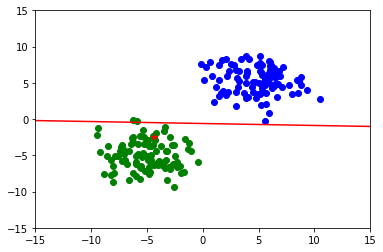

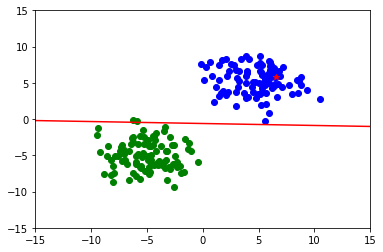

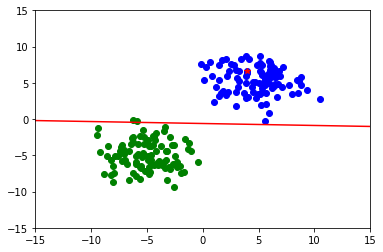

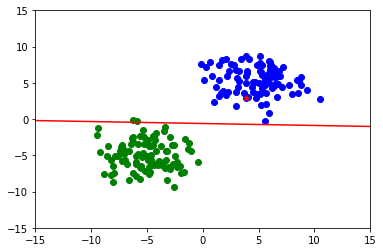

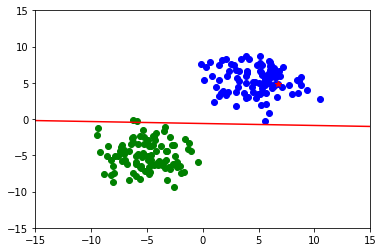

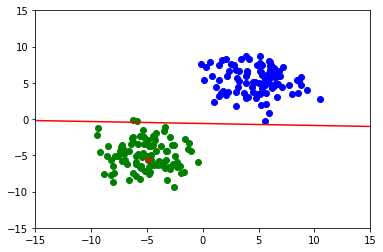

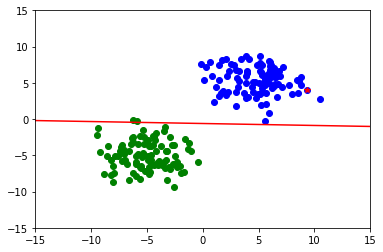

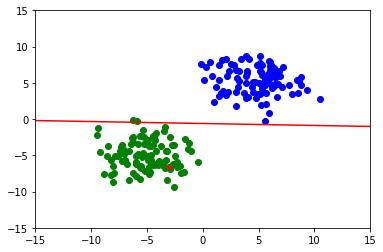

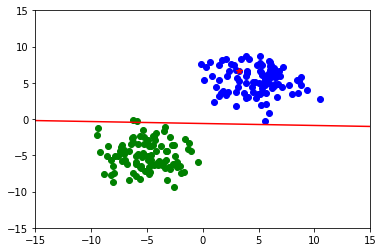

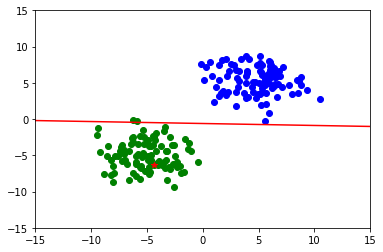

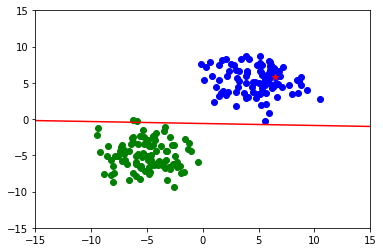

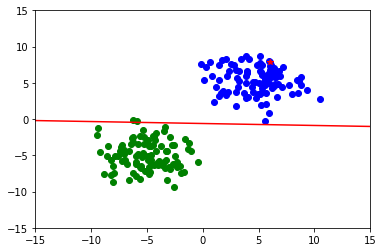

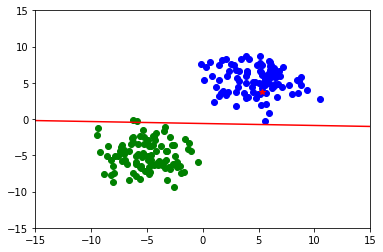

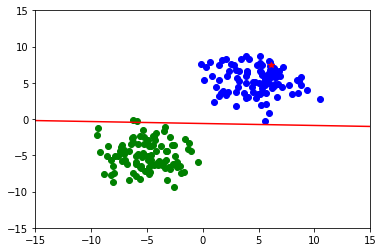

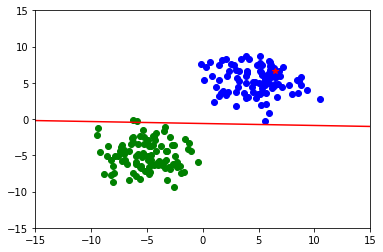

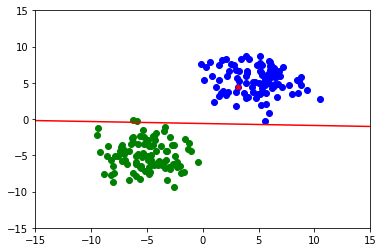

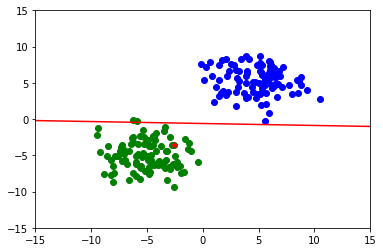

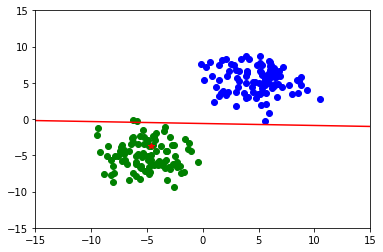

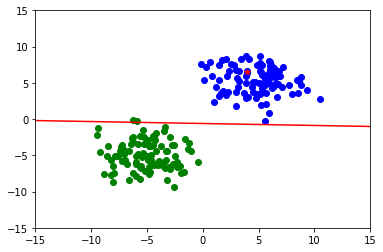

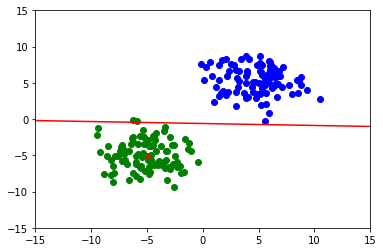

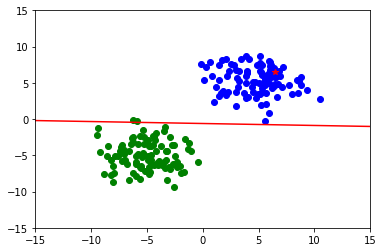

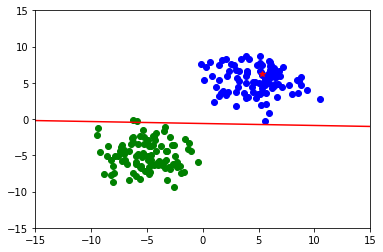

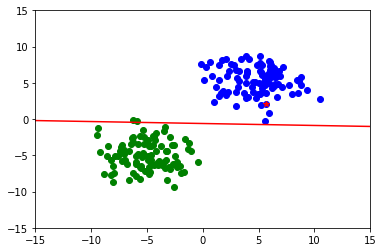

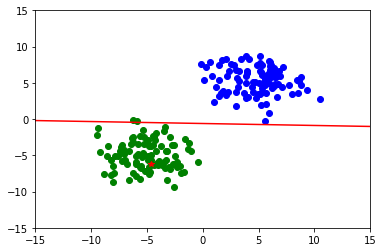

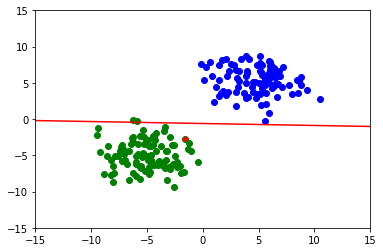

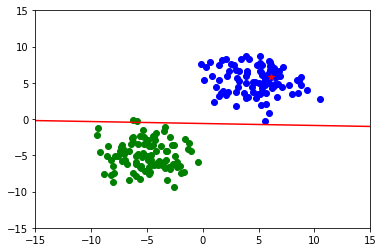

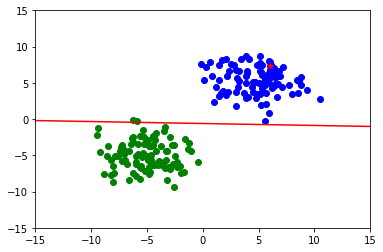

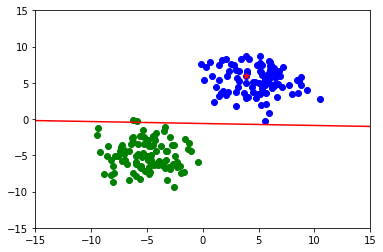

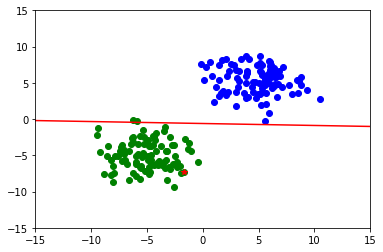

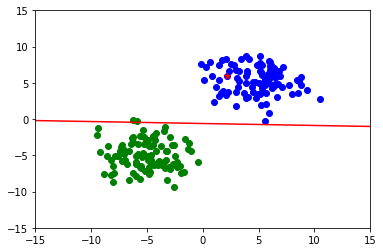

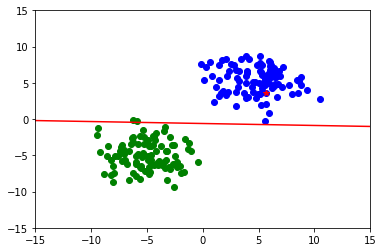

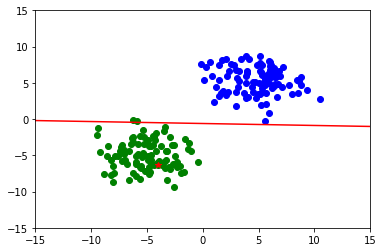

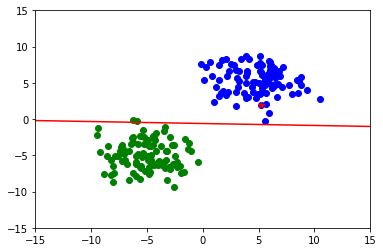

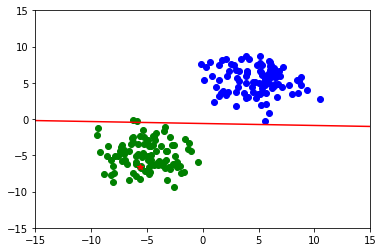

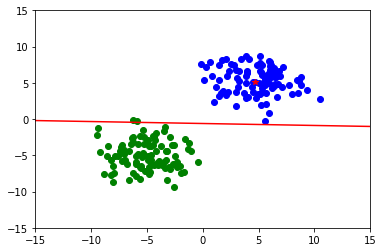

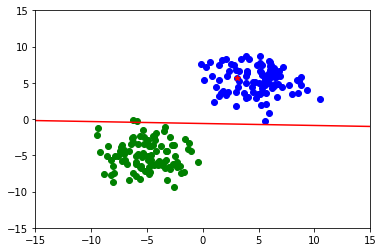

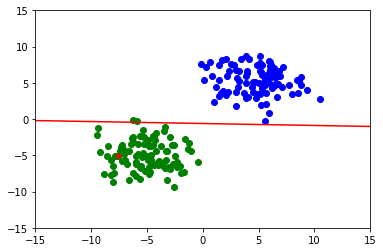

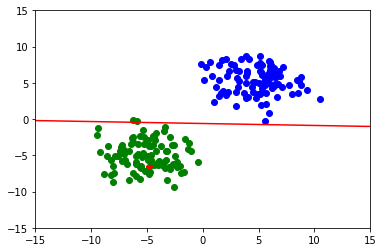

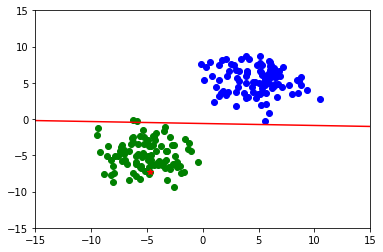

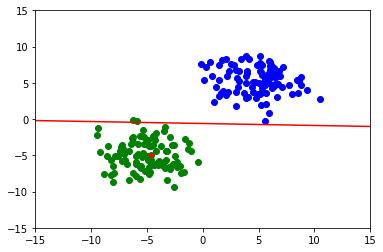

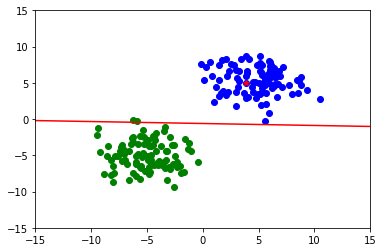

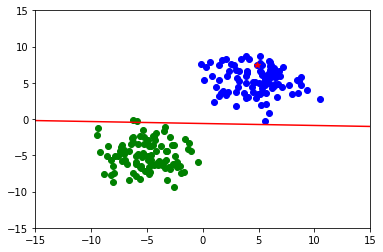

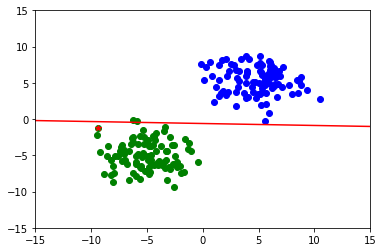

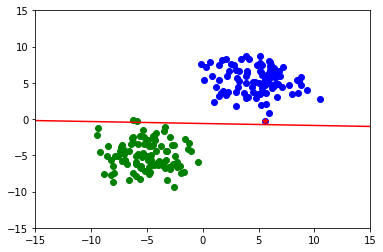

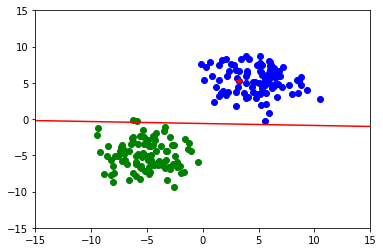

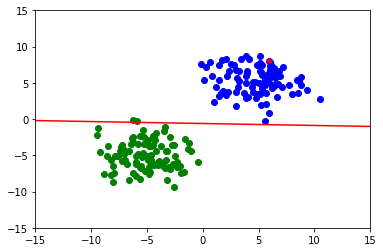

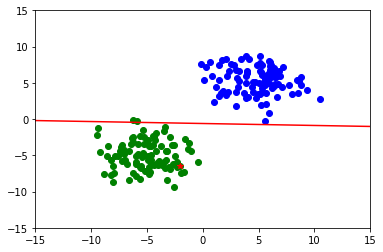

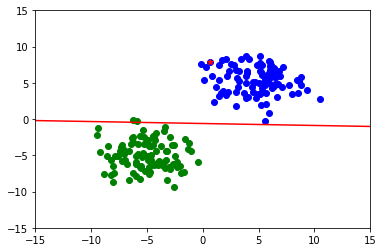

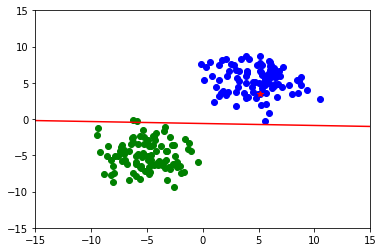

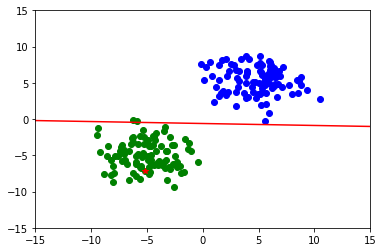

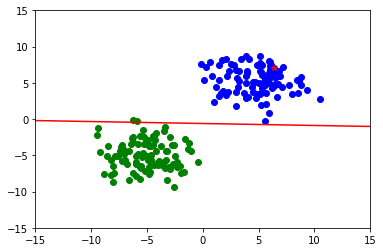

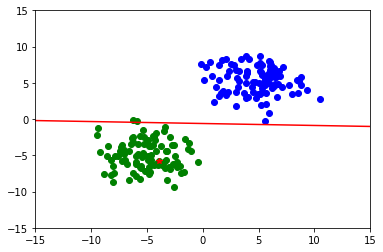

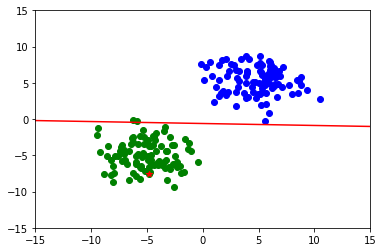

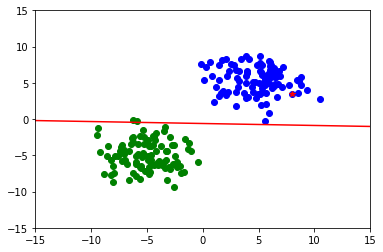

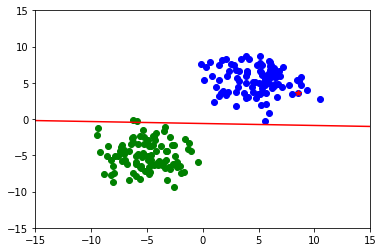

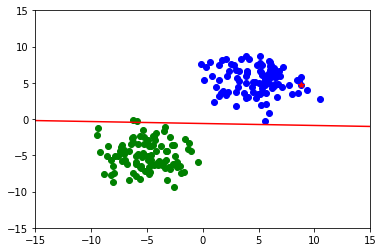

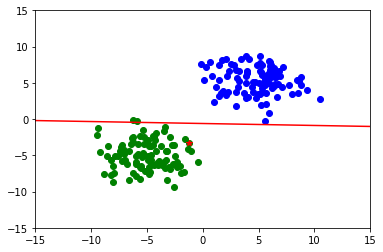

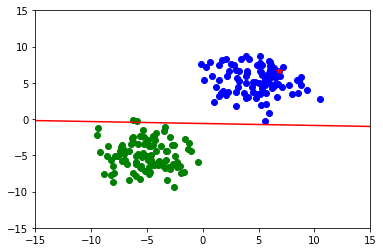

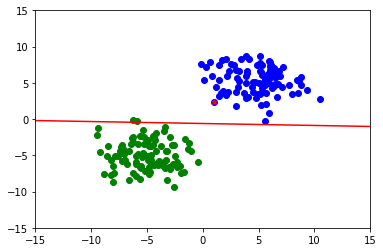

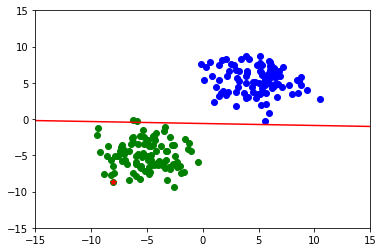

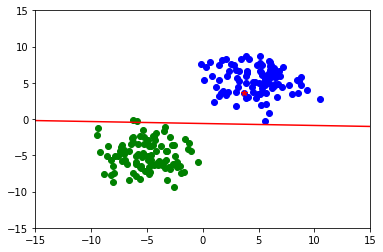

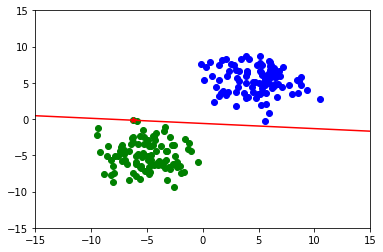

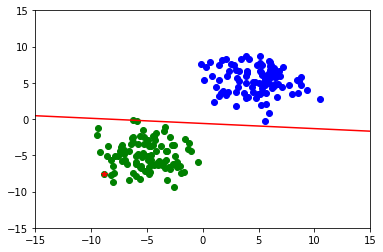

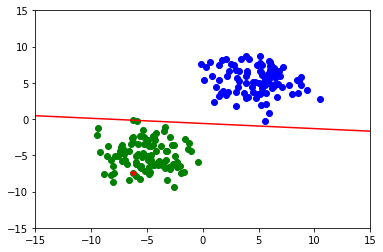

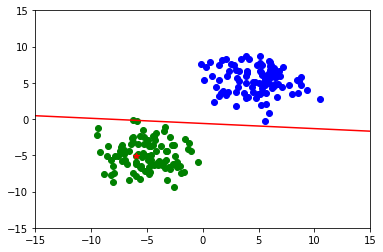

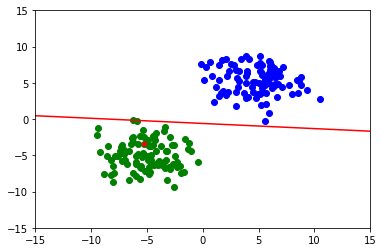

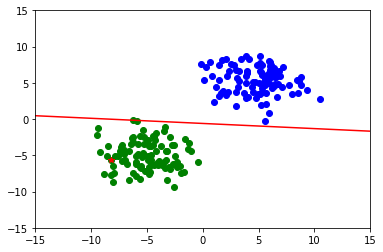

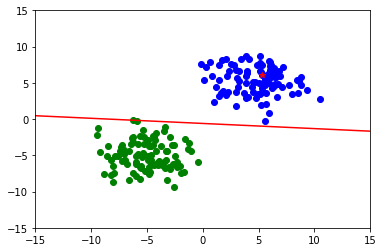

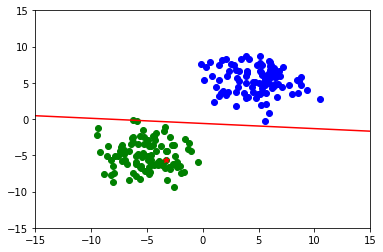

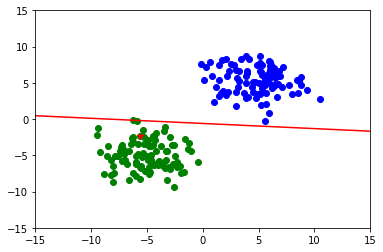

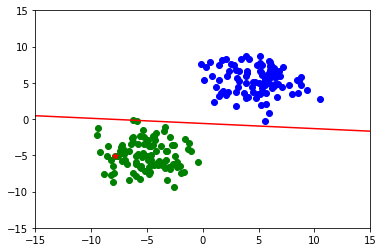

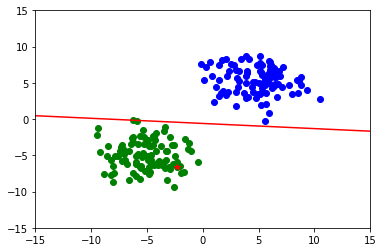

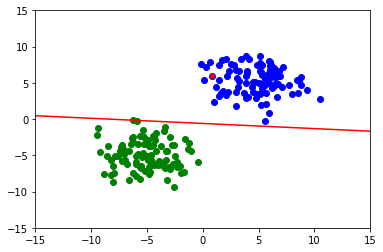

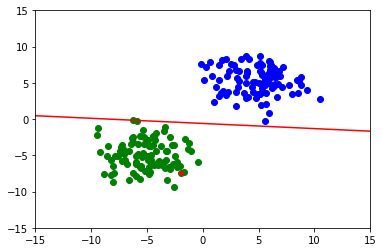

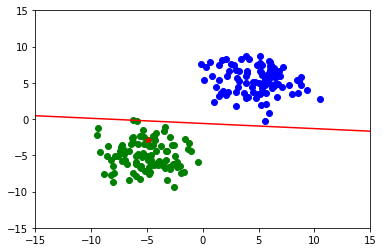

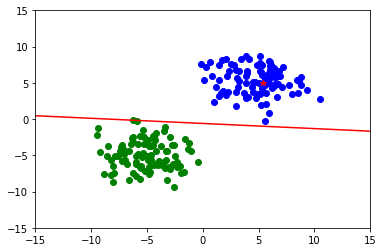

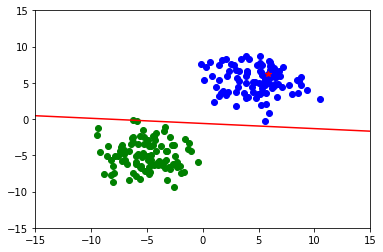

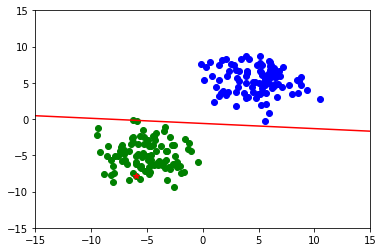

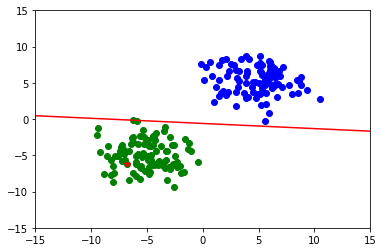

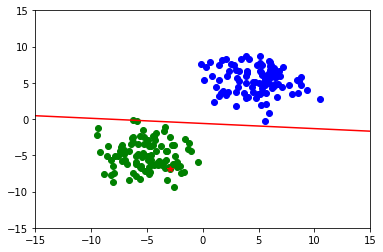

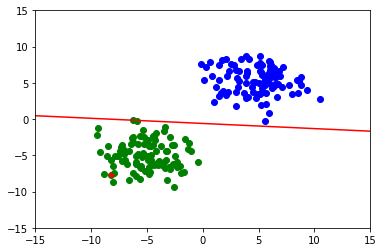

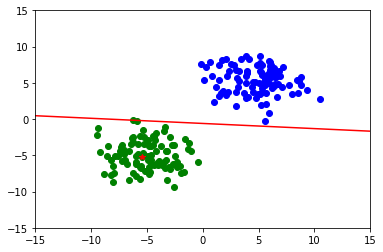

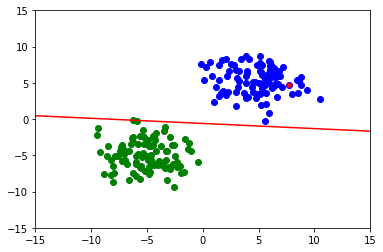

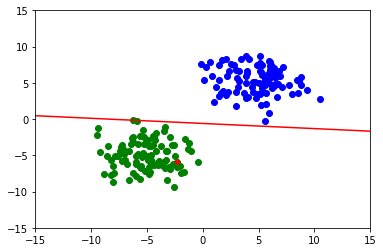

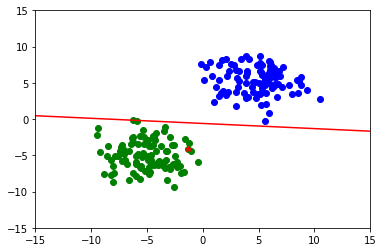

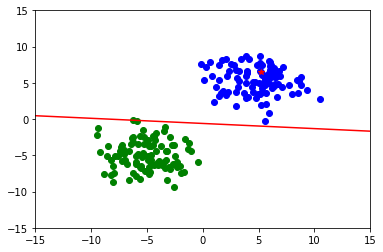

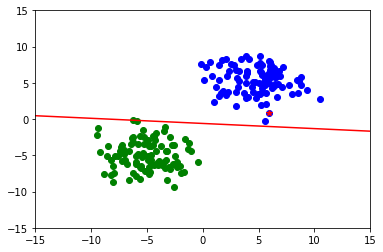

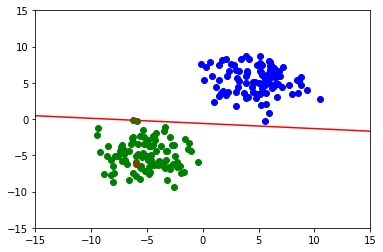

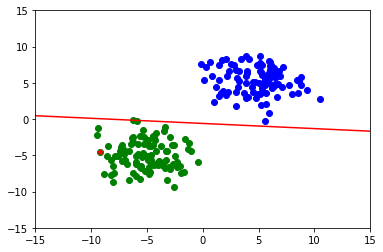

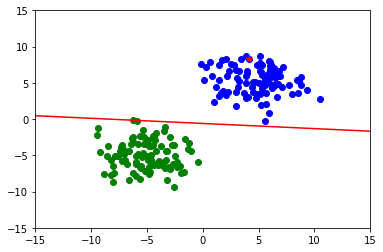

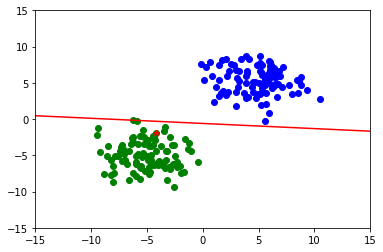

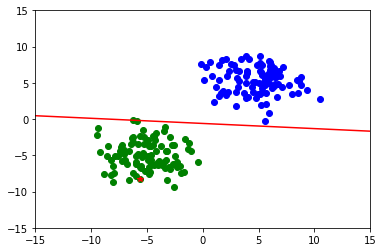

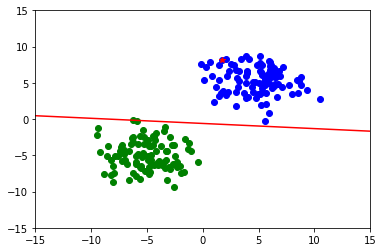

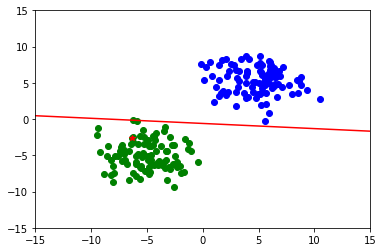

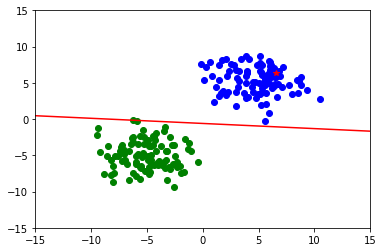

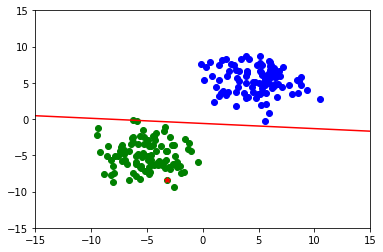

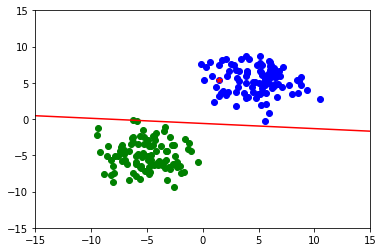

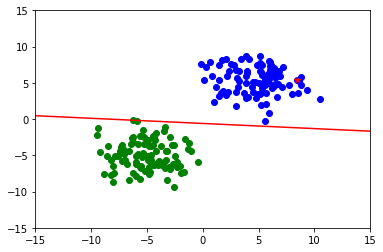

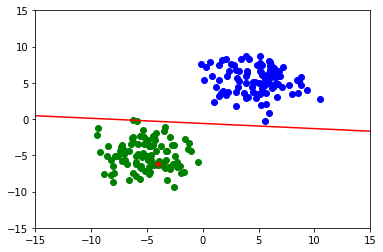

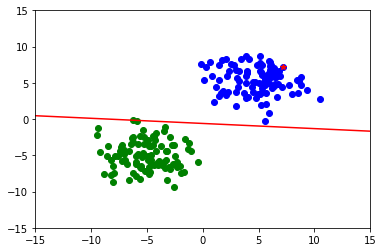

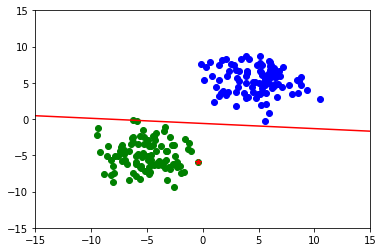

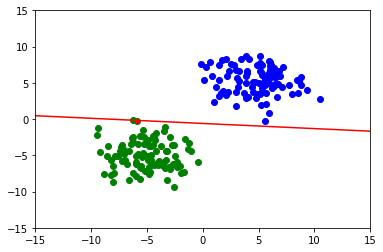

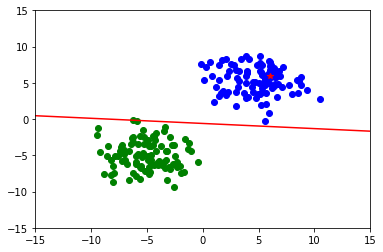

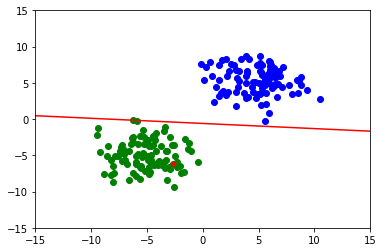

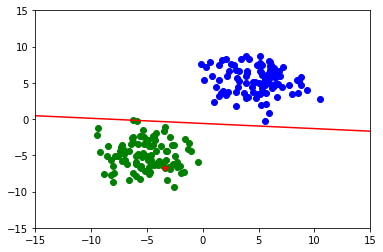

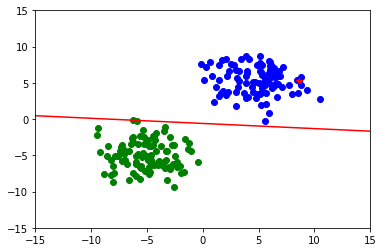

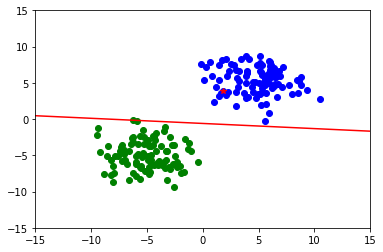

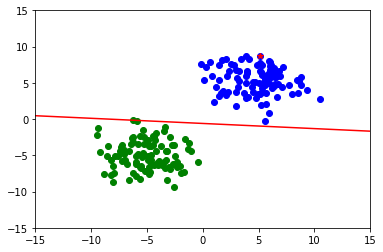

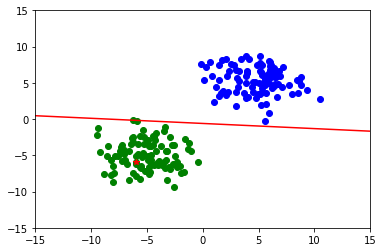

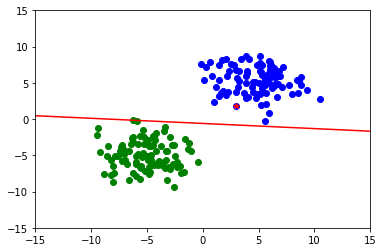

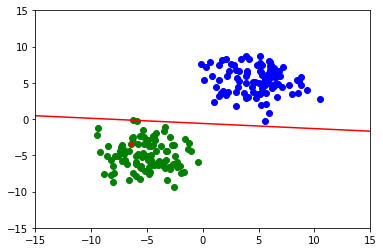

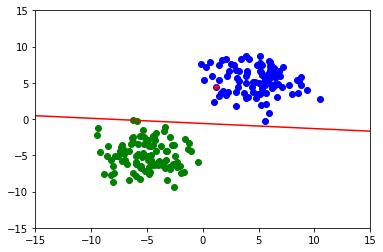

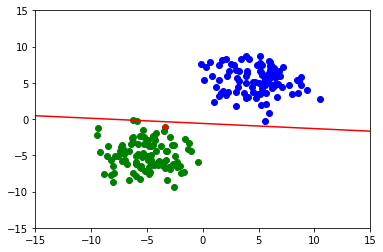

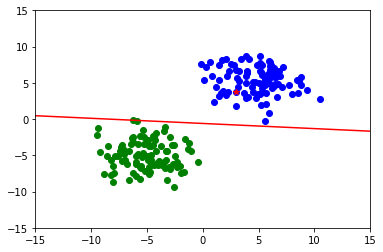

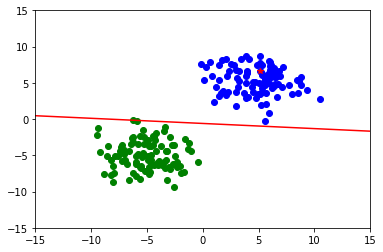

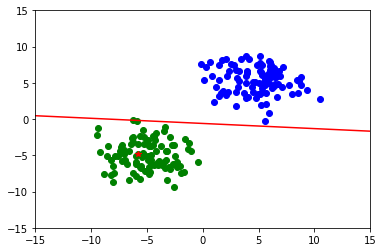

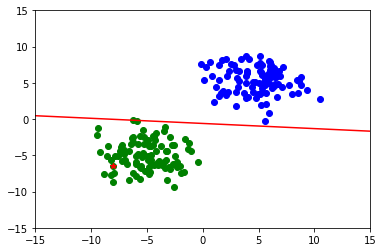

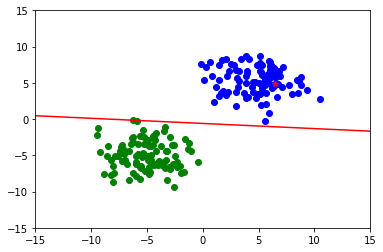

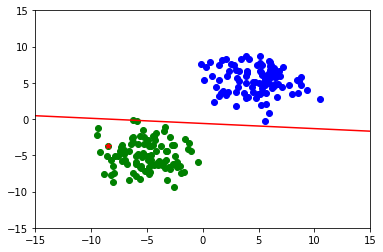

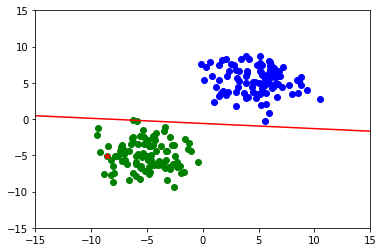

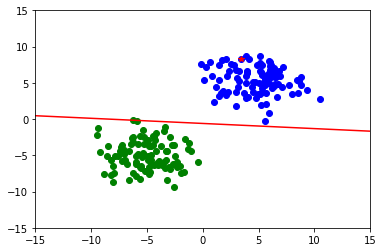

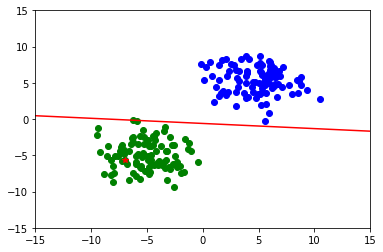

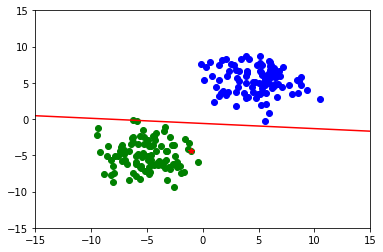

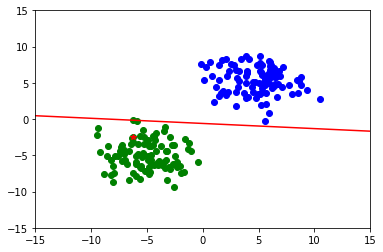

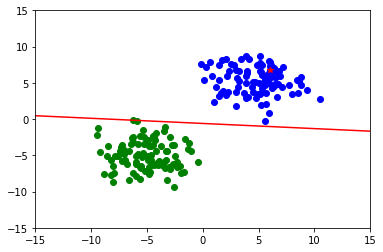

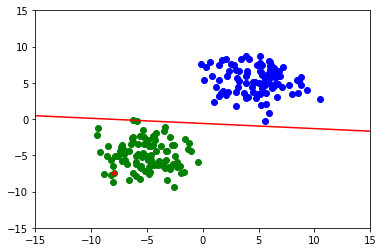

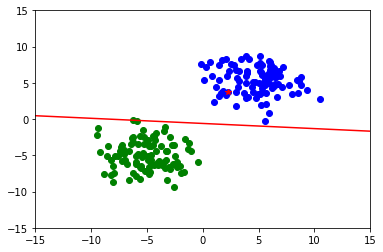

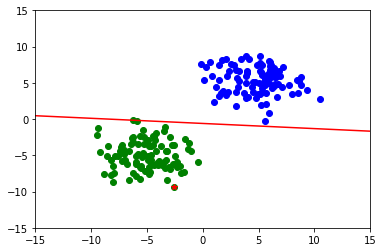

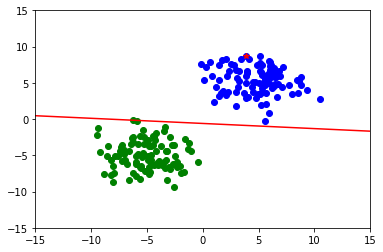

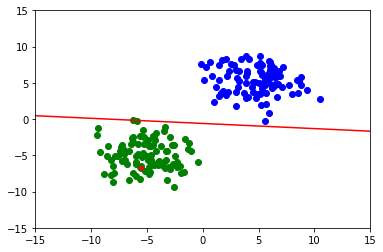

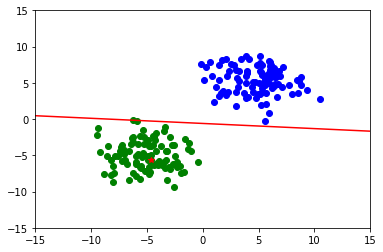

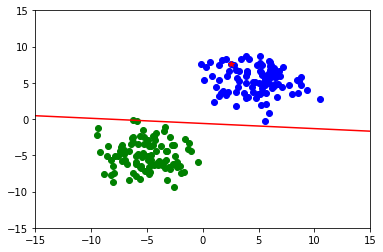

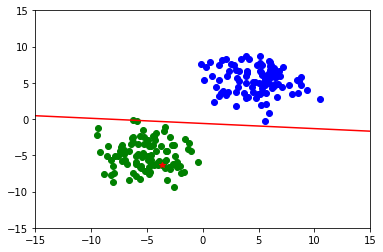

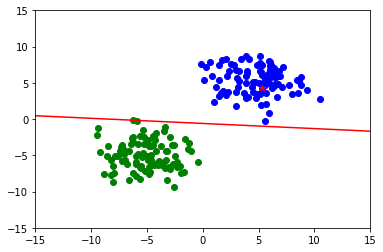

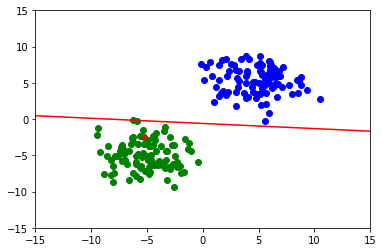

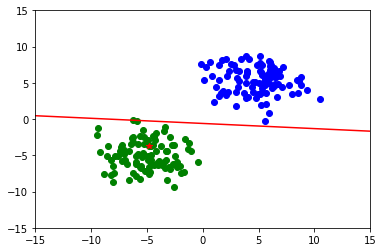

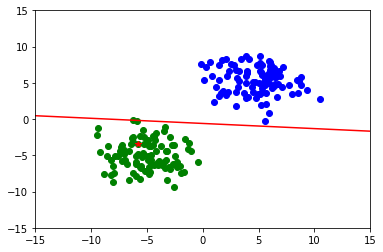

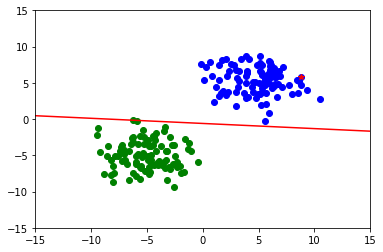

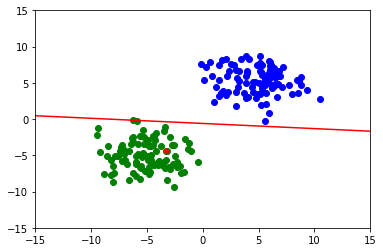

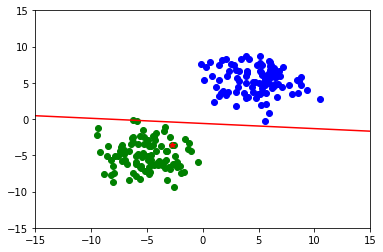

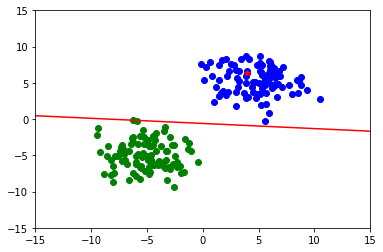

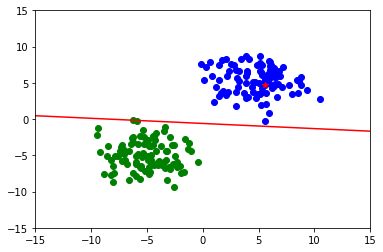

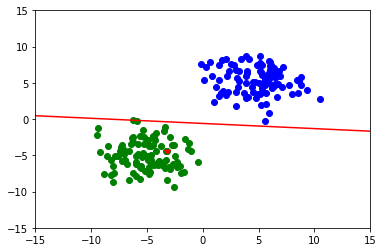

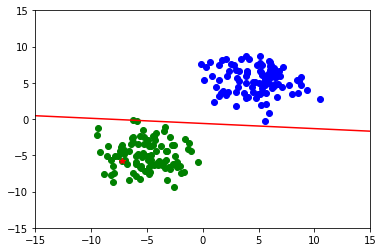

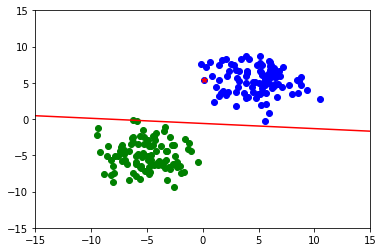

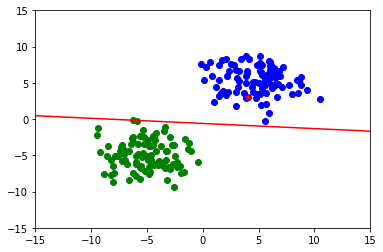

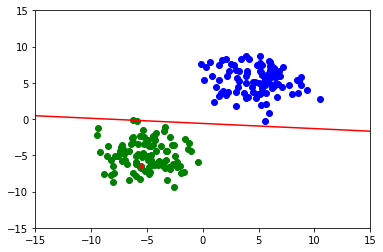

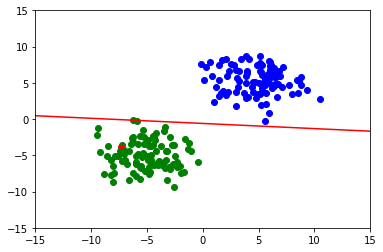

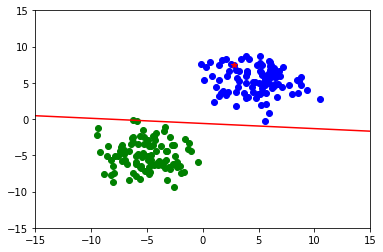

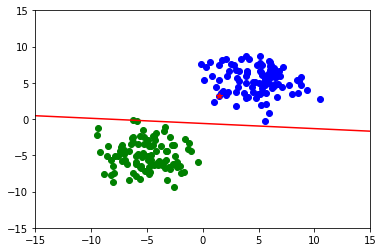

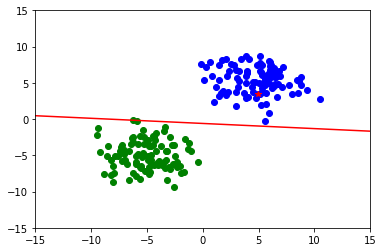

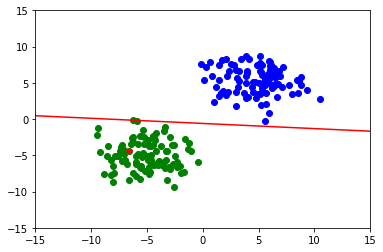

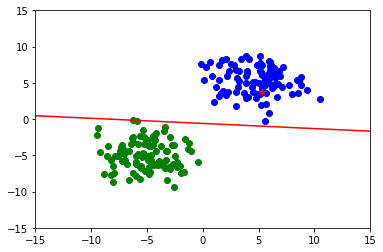

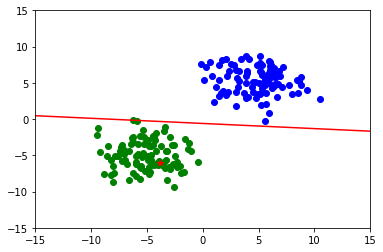

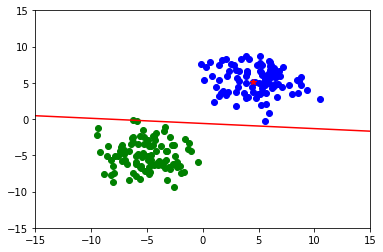

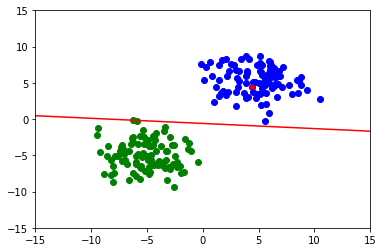

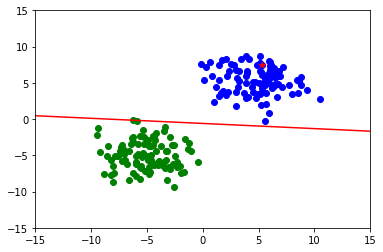

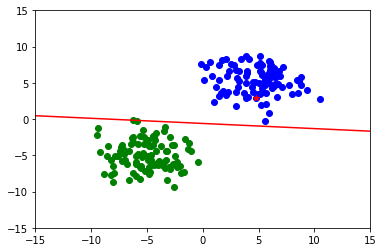

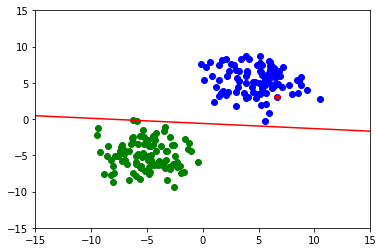

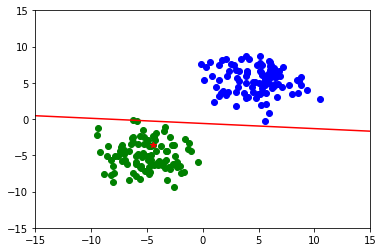

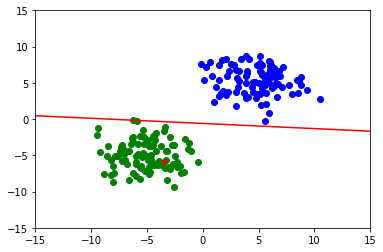

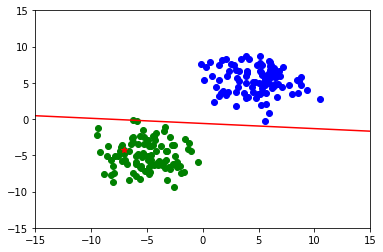

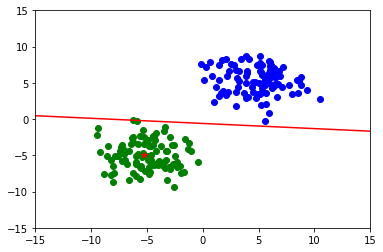

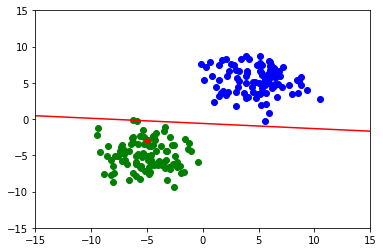

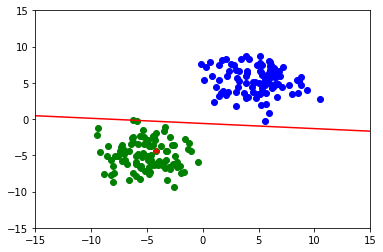

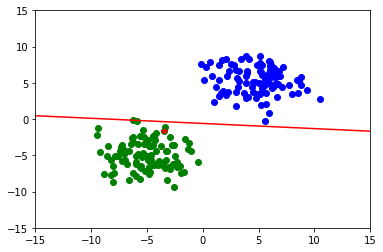

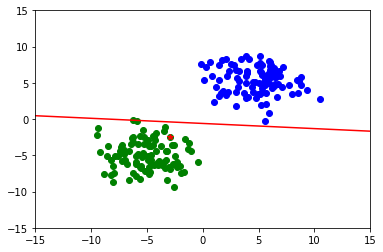

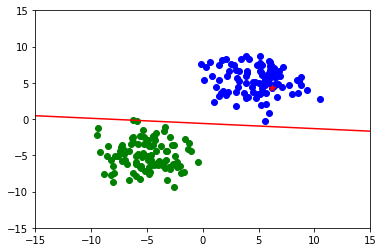

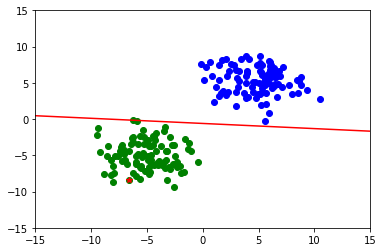

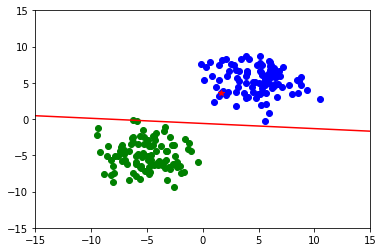

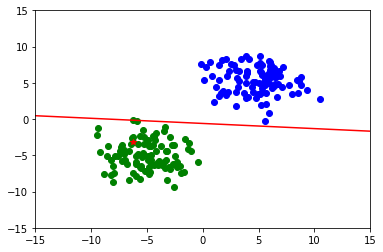

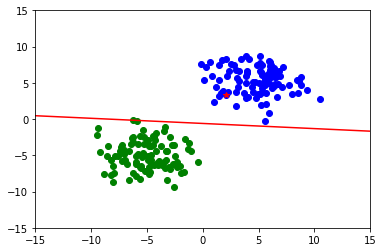

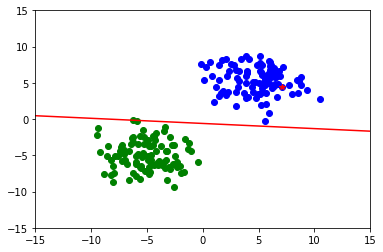

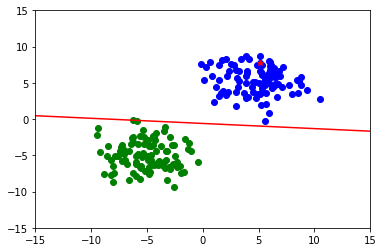

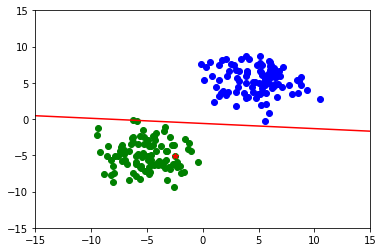

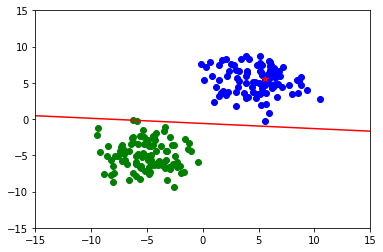

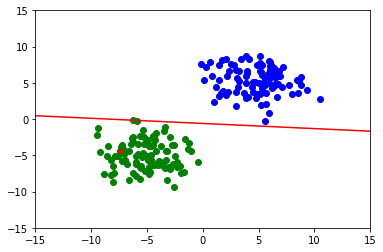

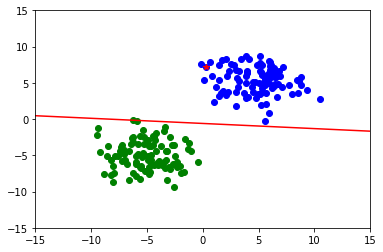

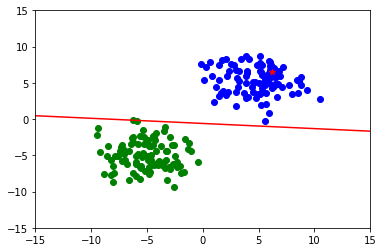

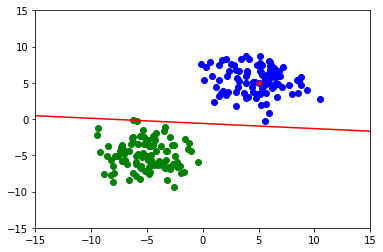

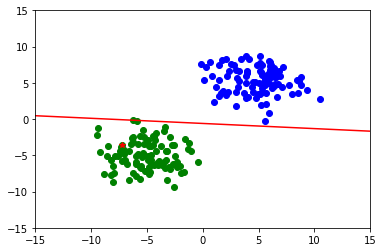

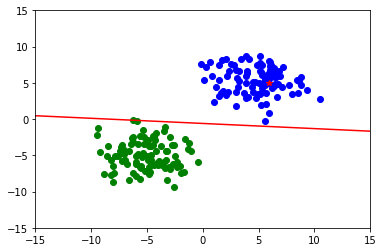

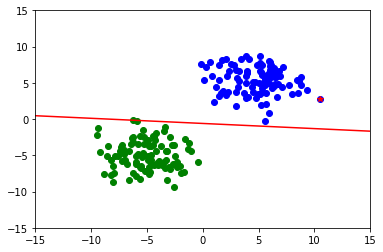

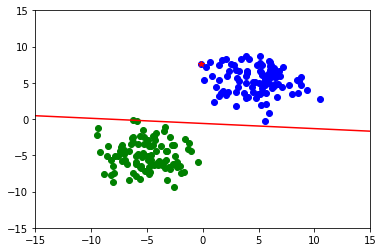

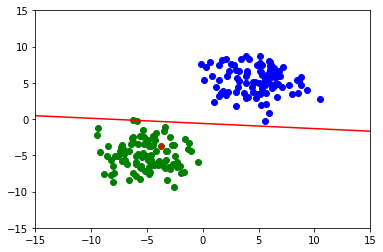

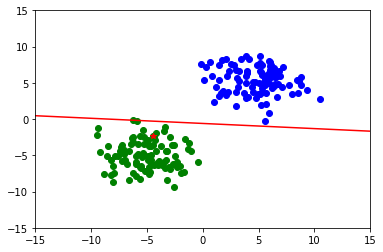

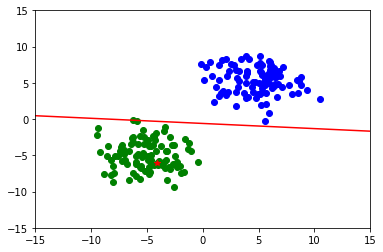

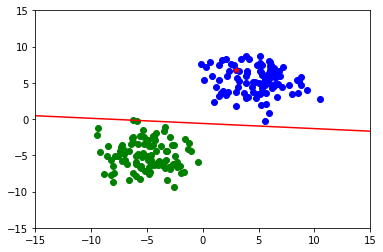

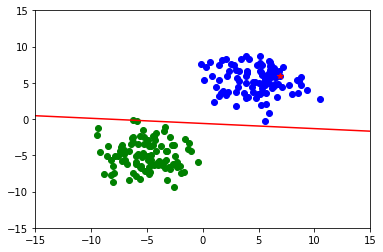

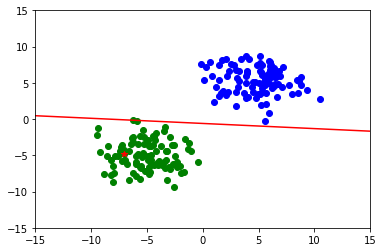

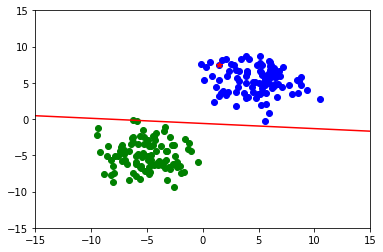

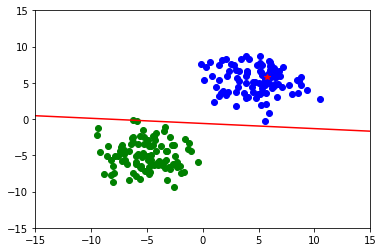

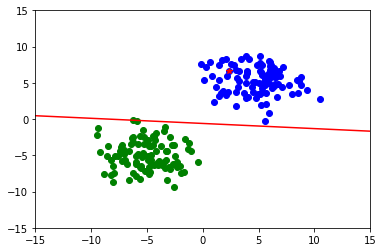

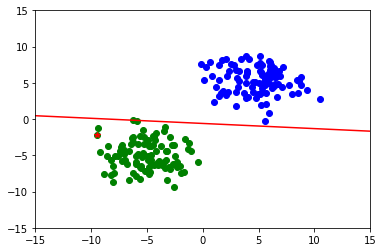

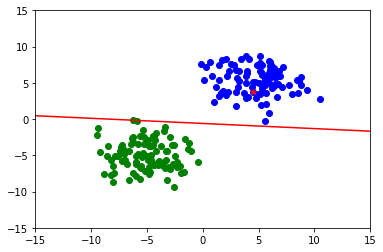

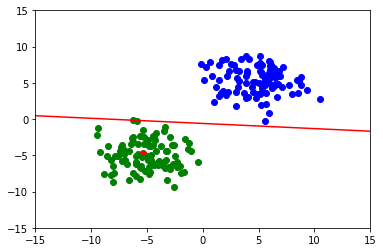

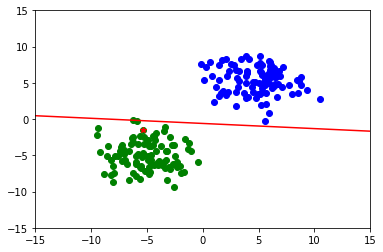

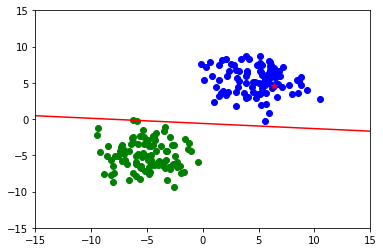

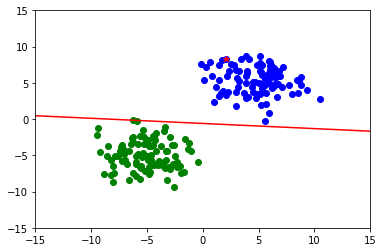

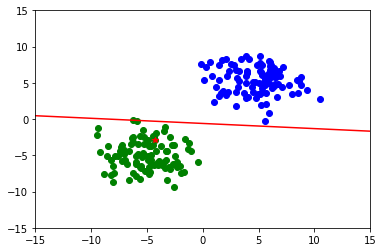

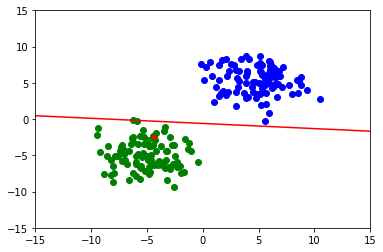

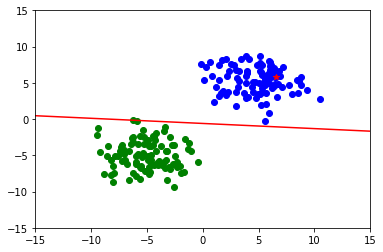

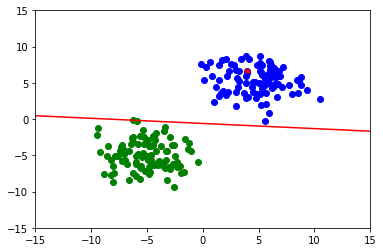

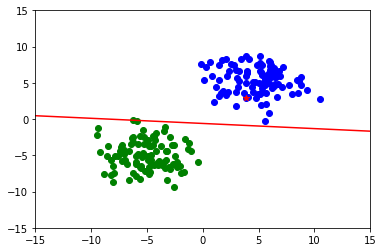

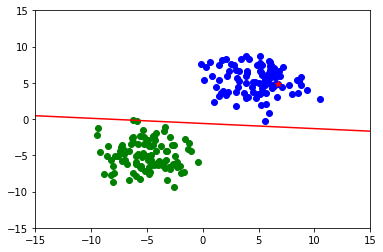

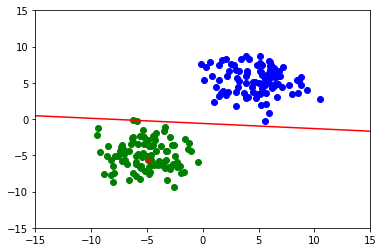

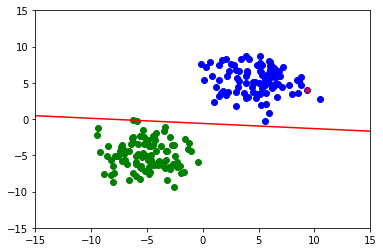

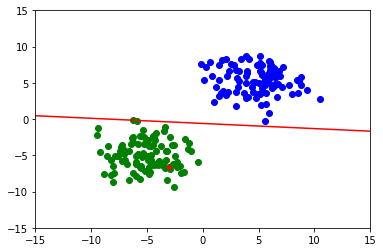

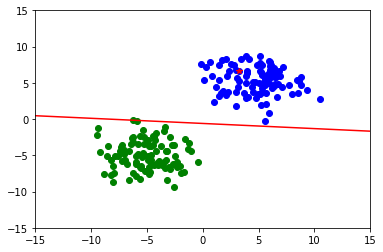

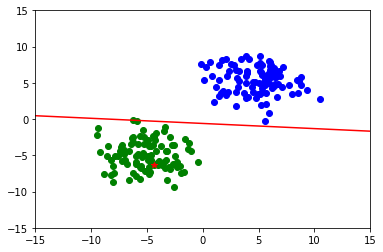

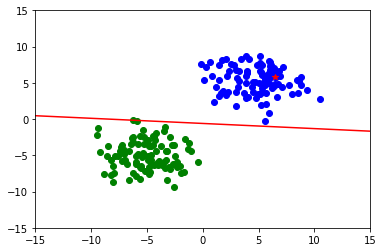

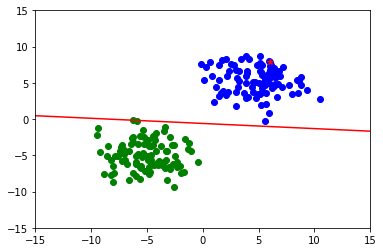

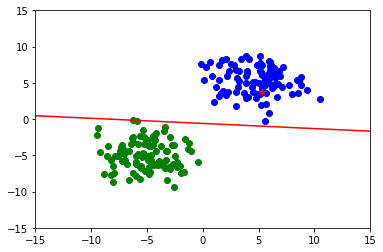

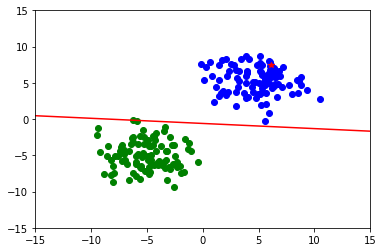

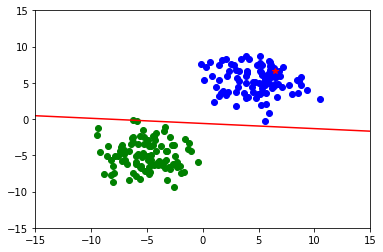

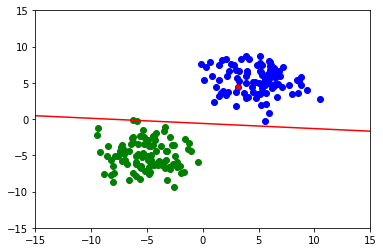

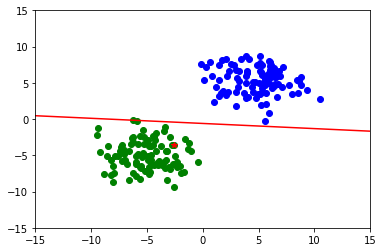

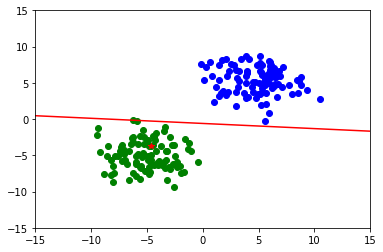

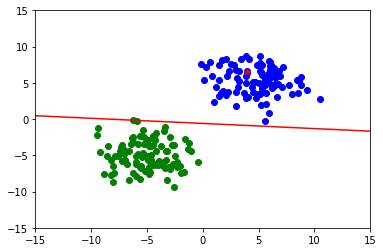

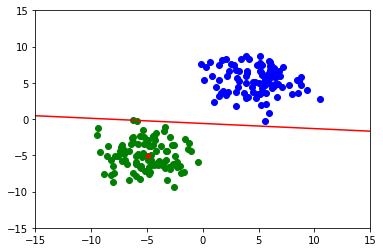

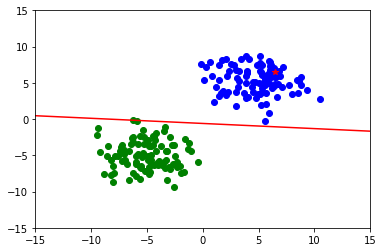

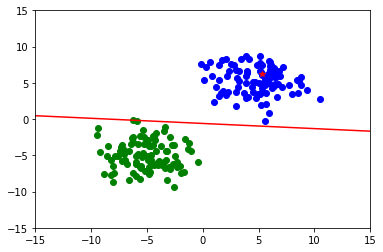

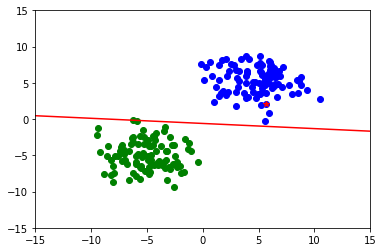

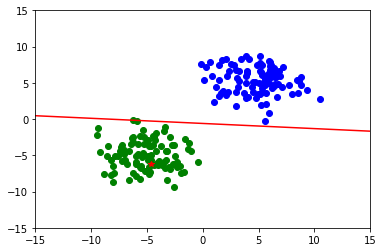

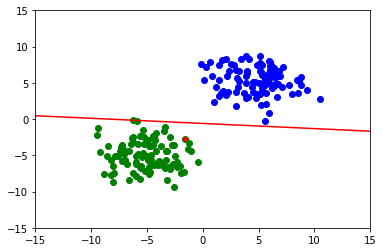

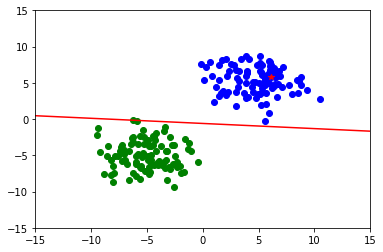

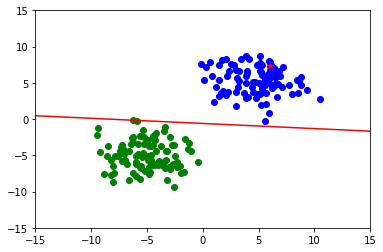

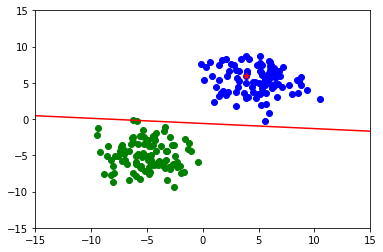

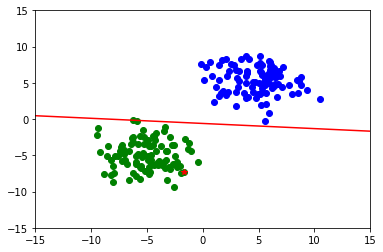

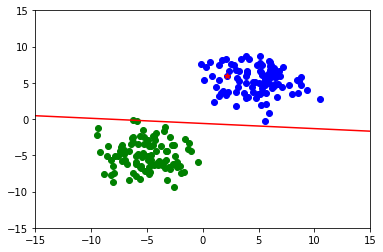

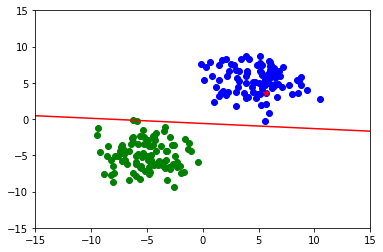

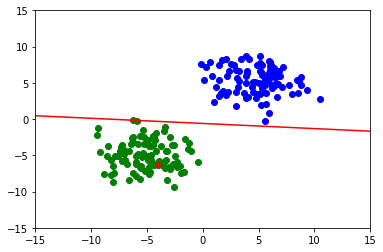

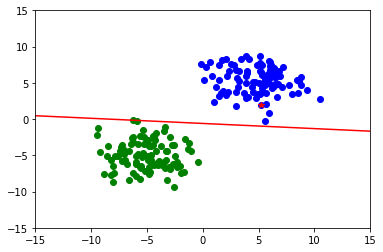

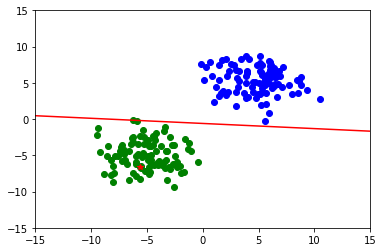

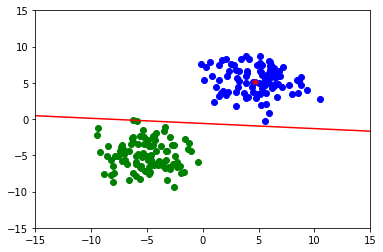

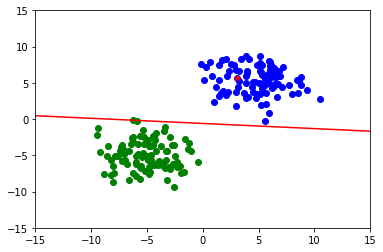

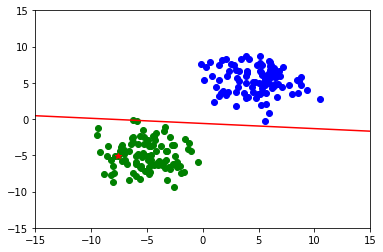

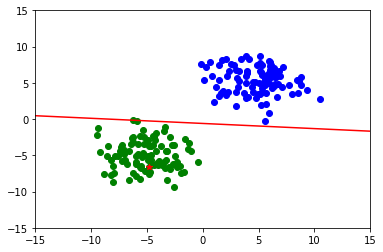

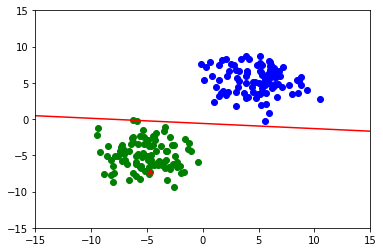

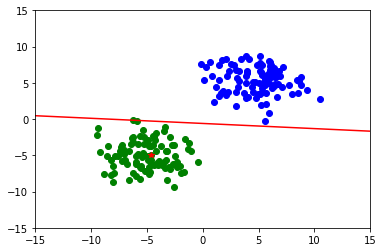

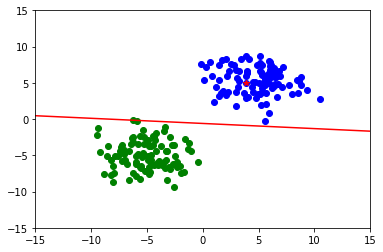

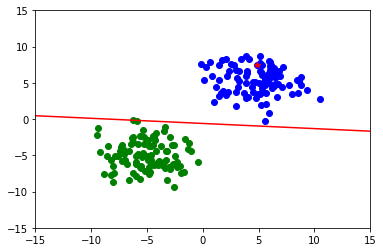

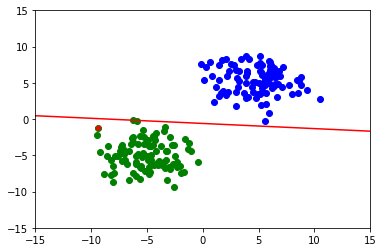

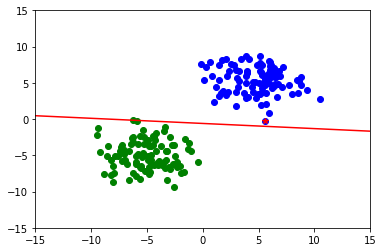

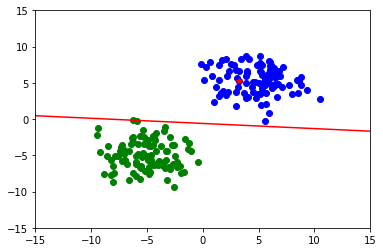

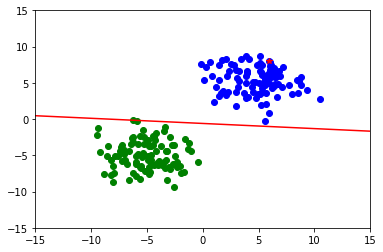

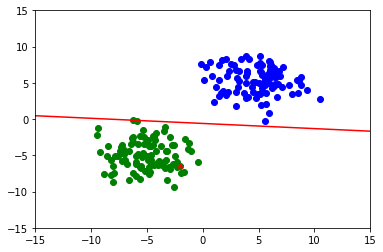

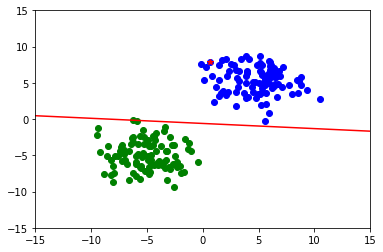

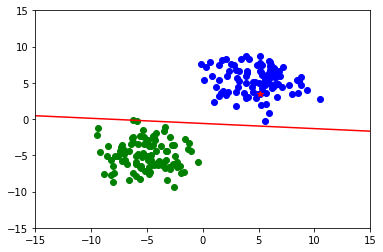

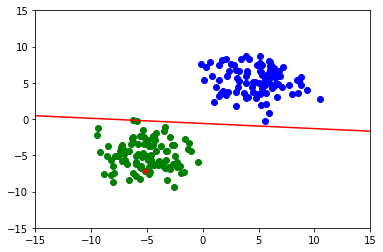

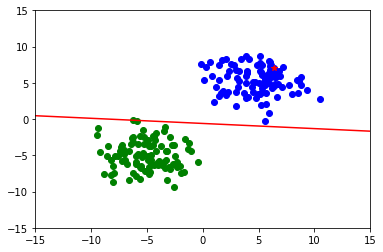

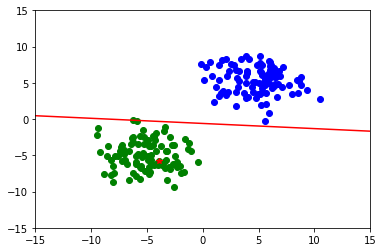

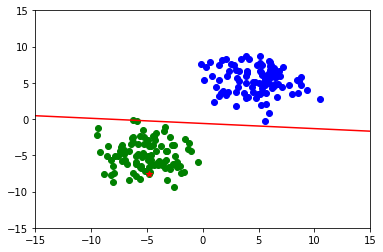

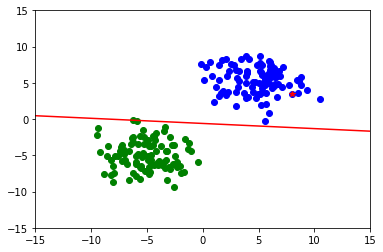

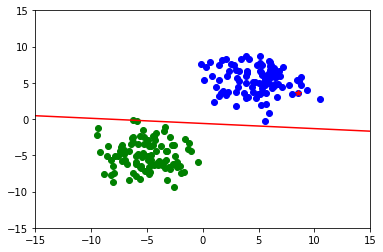

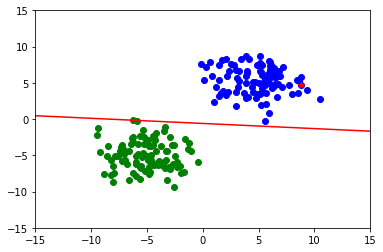

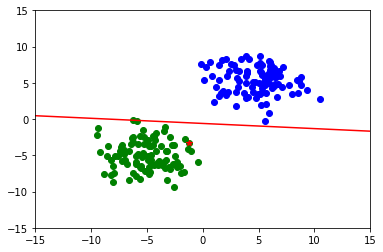

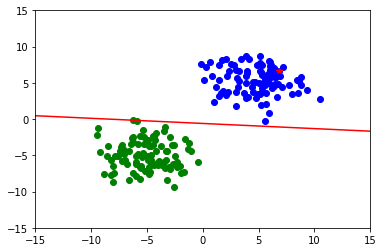

In [53]:
# stochastic perceptron

thetas = initialize_thetas()
iterations = 3

def stochastic_perceptron(thetas, iterations):
    for i in range(iterations):
        for row in list(zip(X,y)):
            p = row[0]
            t = row[1]
            thetas = update_single_point(p, t, thetas, .01)
            show_plot(mat, thetas, p)
    print('final thetats:', thetas)
            
        

def update_single_point(p, t, thetas, lr):
    """
    updates thetas related to an instance p
    """
    update_value = predict(p, thetas[:-1], thetas[-1]) - t # either -1, 0 (if classified correctly), or 1
    thetas[:-1] -= lr * p * update_value
    thetas[-1] -= lr * update_value # update bias
    
    return thetas


stochastic_perceptron(thetas, iterations)

## Batch Perceptron
In batch learning the model update is performed after observing the entire training set.
The learning algorithm in our case will be:<br><br>
Initialize $w$ randomly<br>
Repeat until convergence/fixed number of iterations:<br>
&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp;&emsp; $o^{(d)} = sgn(w\cdot x^{(d)} + b)$<br>
&emsp;&emsp;&emsp; Foreach $w_i\in w$ update:<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\Delta w_i = -\eta \sum_{d\in D}(o^{(d)} - t^{(d)})\cdot x_i^{(d)}$<br>
&emsp;&emsp;&emsp; $b = -\eta \sum_{d\in D}(o^{(d)} - t^{(d)})$<br>
&emsp;&emsp;&emsp; $w = w + \Delta w$<br>

Let's implement:

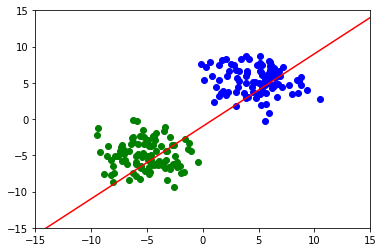

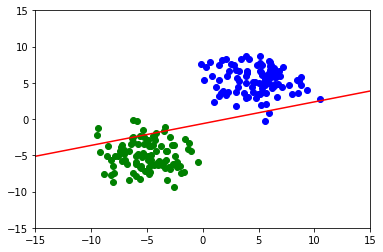

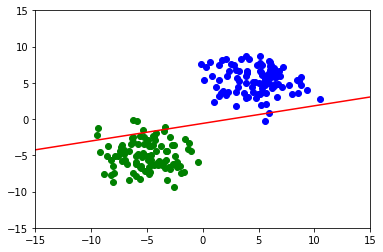

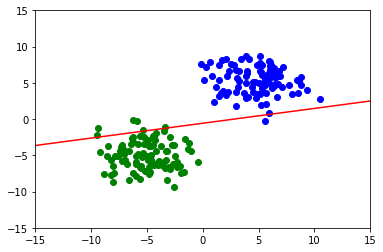

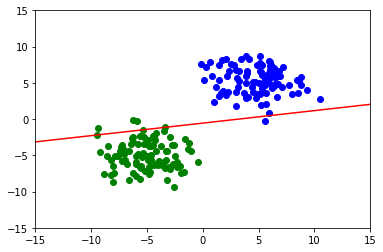

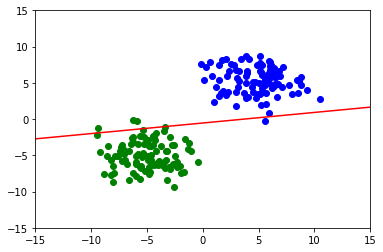

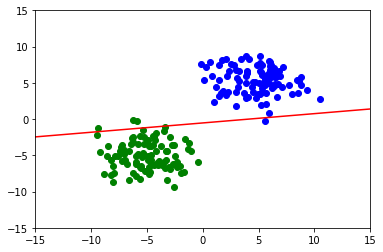

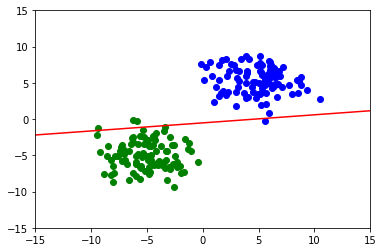

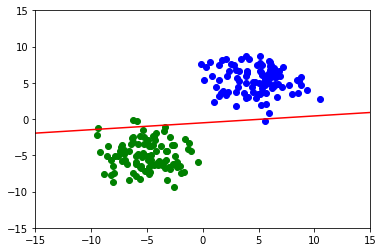

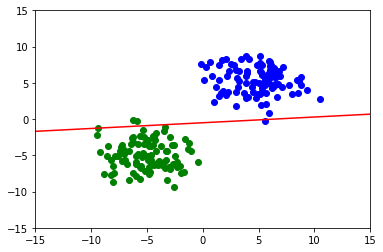

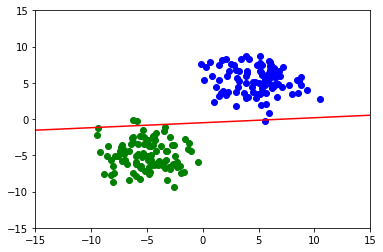

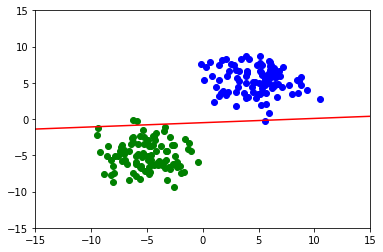

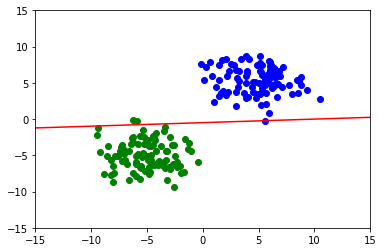

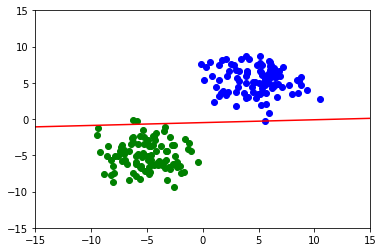

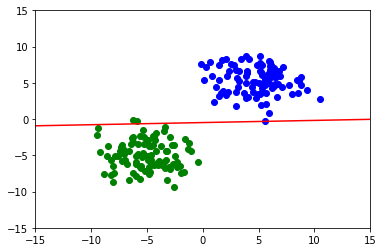

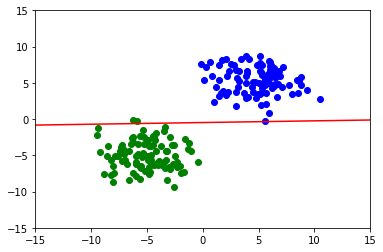

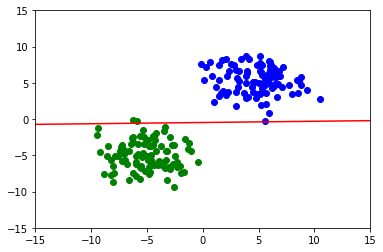

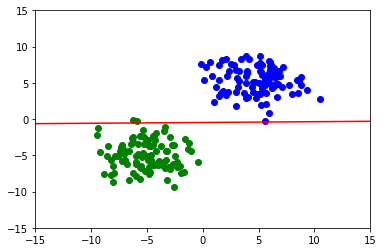

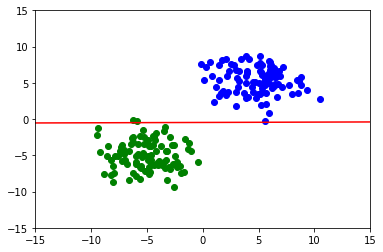

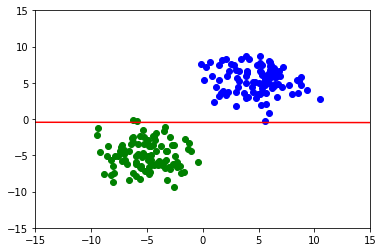

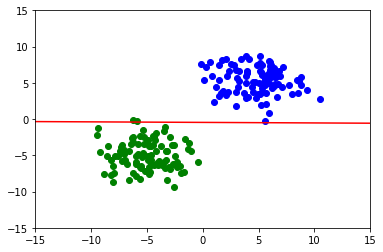

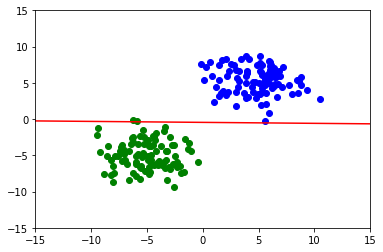

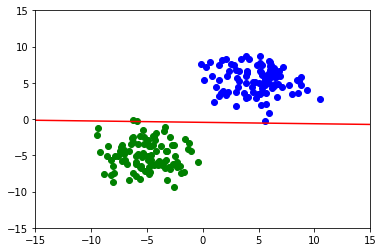

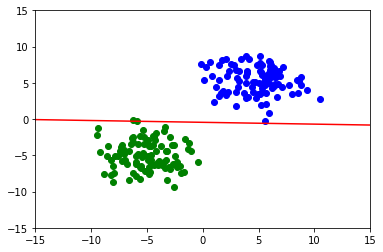

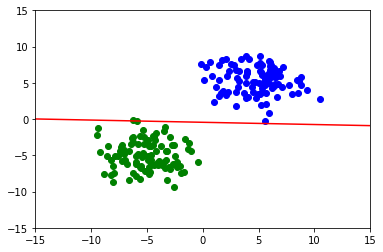

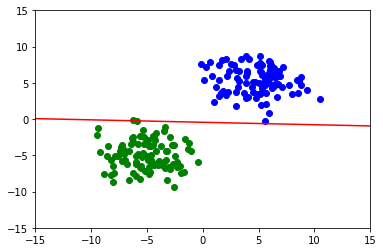

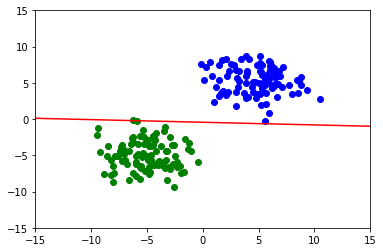

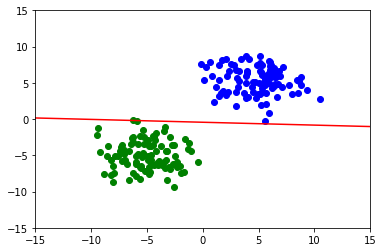

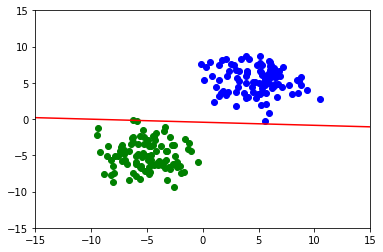

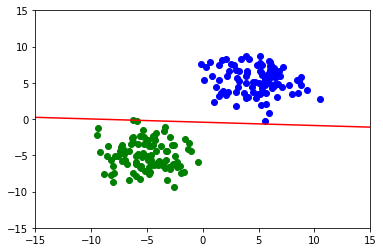

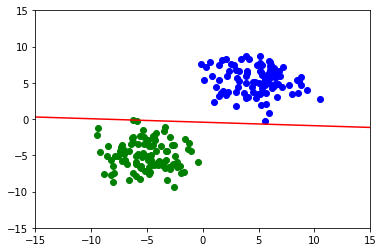

final thetas: [0.10072821 2.10072821 0.908     ]


In [51]:
# stochastic perceptron

thetas = initialize_thetas()
iterations = 30

def batch_perceptron(thetas, iterations):
    show_plot(mat, thetas)
    for i in range(iterations):
        thetas = update_thetas(X, y, thetas, .001)
        show_plot(mat, thetas)

    print('final thetas:', thetas)
    
    
def update_thetas(X, y, thetas, lr):
    thetas += np.apply_along_axis(lambda row: get_delta_theta(row, thetas, lr), 1, mat).sum(axis=0)
    return thetas


def get_delta_theta(row, thetas, lr):
    p = np.array(row[:-1])
    t = row[2]
    delta_theta = np.zeros(3)
    update_value = predict(p, thetas[:-1], thetas[-1]) - t # either -1, 0 (if classified correctly), or 1
    delta_theta[:-1] -= lr*p[:-1]*update_value
    delta_theta[-1] -= lr*update_value # update bias
    
    return delta_theta

batch_perceptron(thetas, iterations)